<a href="https://colab.research.google.com/github/PilouZer/PilouZer/blob/main/AilyLabs_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/PilouZer/PilouZer/blob/main/AilyLabs_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd, numpy as np                    # Data manipulation 
from matplotlib import pyplot as plt                # Graphing
import seaborn as sns                               # Graphing
import plotly.express as px                         # Graphing
import statsmodels.api as sm                        # Statistical analysis
sns.set(style="white")                              # Tuning the style of charts
import warnings                                     # Disable some warnings
warnings.filterwarnings("ignore")
from scipy import stats                             # Stats
pd.set_option('display.max_rows', 1000)             # Change viewing options for rows
pd.set_option('display.max_columns', 50)            # Change viewing options for rows
from sklearn.ensemble import RandomForestClassifier # first base model
from sklearn.model_selection import GridSearchCV    # hyperparameter tuning 
from sklearn.compose import ColumnTransformer       # column transformer
from sklearn.preprocessing import StandardScaler    # scaler
from sklearn.preprocessing import OneHotEncoder     # encoder
from sklearn.decomposition import PCA               # PCA
from sklearn.metrics import roc_auc_score, recall_score, precision_score  # used for cross-validation on our validation set 
from sklearn.svm import SVC                         # SupportVectorClassifier
from sklearn.model_selection import train_test_split# splitting data into training and into validation set
from sklearn.linear_model import LogisticRegression # Logistic Regression 
import xgboost as xgb                               # XGBClassifier
from sklearn.metrics import brier_score_loss        # brier metric to evaluate models
import plotly.graph_objects as go                   # import to show ROC curve
from sklearn.metrics import roc_curve
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.utils import resample

### Loading Data

In [148]:
train_data = pd.read_csv("aily_case_training_data.csv")
train_output = pd.read_csv("aily_case_training_output.csv")
train_hist = pd.read_csv("aily_case_training_hist_data.csv")

test_data = pd.read_csv("aily_case_test_data.csv")
test_output = pd.read_csv("aily_case_test_output_template.csv")
test_hist = pd.read_csv("aily_case_test_hist_data.csv")

In [149]:
train_data

contract_id                  company_category  \
0      d07d473503c6bef7cf1922fab1f88f3e                               NaN   
1      79e38c743a89ad6b950ae6136bbaeb2b  ixuciffexbsibwibpcwdmfwcoixkfscw   
2      6f6a16ed39fd75715b1acc656c749f83  fmwdwsxillemwbbwelxsampiuwwpcdcb   
3      1d8e17bf13218e671e968871e0c6373f  afeccskfmobewicibxofslkxecsuekfi   
4      2c195164c61eeb0edee79688790f3dda                               NaN   
...                                 ...                               ...   
13950  7846ee192c1030d0a8a644b127c1698d  lasmxduedduxxkmwliaudpdsfcacewpo   
13951  527e9cc9ac1ae53584a1f0e15c621be5                               NaN   
13952  0c0ed27696cfae9c35b59413741b8426  wwsobfkddbekdkdawkeiemomebebebii   
13953  b8d9c54ee4a2ca39f3e0f4b842a27973                               NaN   
13954  09d943f7a8c09abb51117801abd866a2  bxopwkbwdewxssbmkwcummkaakbwafxf   

       campaing_code_elect                           channel  \
0                      NaN  lmkebamcaaclubfxadlmueccxoimlema   
1                      NaN  foosdfpfkusacimwkcsosbicdxkicaua   
2                      NaN  foosdfpfkusacimwkcsosbicdxkicaua   
3                      NaN  foosdfpfkusacimwkcsosbicdxkicaua   
4                      NaN  foosdfpfkusacimwkcsosbicdxkicaua   
...                    ...                               ...   
13950                  NaN  foosdfpfkusacimwkcsosbicdxkicaua   
13951                  NaN  usilxuppasemubllopkaafesmlibmsdf   
13952                  NaN  foosdfpfkusacimwkcsosbicdxkicaua   
13953                  NaN  ewpakwlliwisiwduibdlfmalxowmwpci   
13954                  NaN                               NaN   

       elect_cons_at_12m  gas_cons_at_12m  elect_cons_last_month  \
0                   1577                0                      0   
1                 280731                0                  16856   
2                  99223           189585                   4783   
3                  10381                0                      0   
4                   6107                0                      0   
...                  ...              ...                    ...   
13950              13051            21556                    223   
13951              18226             2620                   2010   
13952              69566                0                   3108   
13953              12557                0                   2000   
13954              97106                0                   5807   

      contract_activation_date contract_end_date contract_fist_act_date  \
0                   2010-01-05        2016-12-12                    NaN   
1                   2009-11-04        2016-11-04                    NaN   
2                   2013-02-16        2016-02-16                    NaN   
3                   2012-01-25        2017-01-25                    NaN   
4                   2011-11-12        2016-11-12             2011-11-12   
...                        ...               ...                    ...   
13950               2012-12-04        2016-12-04                    NaN   
13951               2013-02-04        2016-02-04                    NaN   
13952               2011-02-07        2016-02-07             2011-02-07   
13953               2013-04-01        2016-09-16                    NaN   
13954               2005-05-24        2016-05-24                    NaN   

      contract_last_mod_date contract_renewal_date  \
0                 2015-11-01            2015-12-14   
1                 2009-11-04            2015-11-05   
2                 2013-02-16            2015-02-18   
3                 2015-12-16            2016-01-26   
4                 2015-09-20            2015-11-13   
...                      ...                   ...   
13950             2012-12-04            2015-12-06   
13951             2015-12-15            2015-02-05   
13952             2011-02-07            2015-02-09   
13953             2015-09-16            2015-03-11   
13954                 

In [3]:
train_data.head()

contract_id                  company_category  \
0  d07d473503c6bef7cf1922fab1f88f3e                               NaN   
1  79e38c743a89ad6b950ae6136bbaeb2b  ixuciffexbsibwibpcwdmfwcoixkfscw   
2  6f6a16ed39fd75715b1acc656c749f83  fmwdwsxillemwbbwelxsampiuwwpcdcb   
3  1d8e17bf13218e671e968871e0c6373f  afeccskfmobewicibxofslkxecsuekfi   
4  2c195164c61eeb0edee79688790f3dda                               NaN   

   campaing_code_elect                           channel  elect_cons_at_12m  \
0                  NaN  lmkebamcaaclubfxadlmueccxoimlema               1577   
1                  NaN  foosdfpfkusacimwkcsosbicdxkicaua             280731   
2                  NaN  foosdfpfkusacimwkcsosbicdxkicaua              99223   
3                  NaN  foosdfpfkusacimwkcsosbicdxkicaua              10381   
4                  NaN  foosdfpfkusacimwkcsosbicdxkicaua               6107   

   gas_cons_at_12m  elect_cons_last_month contract_activation_date  \
0                0                      0               2010-01-05   
1                0                  16856               2009-11-04   
2           189585                   4783               2013-02-16   
3                0                      0               2012-01-25   
4                0                      0               2011-11-12   

  contract_end_date contract_fist_act_date contract_last_mod_date  \
0        2016-12-12                    NaN             2015-11-01   
1        2016-11-04                    NaN             2009-11-04   
2        2016-02-16                    NaN             2013-02-16   
3        2017-01-25                    NaN             2015-12-16   
4        2016-11-12             2011-11-12             2015-09-20   

  contract_renewal_date  fcst_bill_baseline_elect_next_month  \
0            2015-12-14                                  NaN   
1            2015-11-05                                  NaN   
2            2015-02-18                                  NaN   
3            2016-01-26                                  NaN   
4            2015-11-13                                  0.0   

   fcst_bill_baseline_elect_cal_year  fcst_bill_baseline_elect_12m  \
0                                NaN                           NaN   
1                                NaN                           NaN   
2                                NaN                           NaN   
3                                NaN                           NaN   
4                                0.0                    983.785888   

   fcst_consumption_elect_next_month  fcst_consumption_elect_12m  \
0                                NaN                  113.189528   
1                                NaN                12910.745989   
2                                NaN                  622.245387   
3                                NaN                  525.026971   
4                                0.0                  156.718305   

   fcst_consumption_elect_cal_year  fcst_current_discount  \
0                         0.000000                    0.0   
1                     20467.614893                    0.0   
2                         0.000000                    0.0   
3                         0.000000                    0.0   
4                         0.000000                    0.0   

   fcst_bill_meter_rent_12m  fcst_price_period_1  fcst_price_period_2  \
0                  9.533935             0.179799             0.000000   
1                248.193187             0.139908             0.049123   
2                 81.197343             0.151782             0.053042   
3                 89.052476             0.151063             0.052747   
4                 12.829360             0.180165             0.000000   

   fcst_price_power_period_1 client_got_gas  current_paid_consumption  \
0                  29.744311              f                  0.000000   
1                  27.257522              f               1440.595633   
2                  27.257522      

In [4]:
train_output.head()

contract_id  has_churned_over_next_3m
0  6975aab29f35173b43eae4f595b747c7                         0
1  8073016b742f47cf4c76cc41dc410122                         1
2  227c0e6b15256a1d3d3460e15c24ba60                         0
3  e1ea0597bbad7bfd95adf1c7103bfda1                         0
4  a2e017f297f2557a7b1cf4a92bc993e9                         0

In [5]:
train_hist.head()

contract_id reference_date  price_energy_1st_period  \
0  cd7ad4a23c39fd588bf326333786300c     2015-02-01                 0.136157   
1  73c63df734c0948948b61dcab3153dce     2015-06-01                 0.134560   
2  75d7981514dd168b8ca9954c62342426     2015-03-01                 0.153324   
3  3d4e8ae29da9e25cf77dd6966ff8c02e     2015-09-01                 0.133067   
4  5c8b795e6ff043528535ef4060416db3     2015-04-01                 0.137101   

   price_energy_2nd_period  price_energy_3rd_period  price_power_1st_period  \
0                 0.000000                      0.0               39.926856   
1                 0.000000                      0.0               39.926855   
2                 0.067422                      0.0               39.926856   
3                 0.000000                      0.0               39.926855   
4                 0.000000                      0.0               39.926855   

   price_power_2nd_period  price_power_3rd_period  
0                     0.0                     0.0  
1                     0.0                     0.0  
2                     0.0                     0.0  
3                     0.0                     0.0  
4                     0.0                     0.0

### Merge Dataframes

Here I will merge the training output and the training data and do the same for the test to have the target and features in the same dataframe.

In [6]:
data = pd.merge(train_data, train_output, on='contract_id')

In [7]:
data.head()

contract_id                  company_category  \
0  d07d473503c6bef7cf1922fab1f88f3e                               NaN   
1  79e38c743a89ad6b950ae6136bbaeb2b  ixuciffexbsibwibpcwdmfwcoixkfscw   
2  6f6a16ed39fd75715b1acc656c749f83  fmwdwsxillemwbbwelxsampiuwwpcdcb   
3  1d8e17bf13218e671e968871e0c6373f  afeccskfmobewicibxofslkxecsuekfi   
4  2c195164c61eeb0edee79688790f3dda                               NaN   

   campaing_code_elect                           channel  elect_cons_at_12m  \
0                  NaN  lmkebamcaaclubfxadlmueccxoimlema               1577   
1                  NaN  foosdfpfkusacimwkcsosbicdxkicaua             280731   
2                  NaN  foosdfpfkusacimwkcsosbicdxkicaua              99223   
3                  NaN  foosdfpfkusacimwkcsosbicdxkicaua              10381   
4                  NaN  foosdfpfkusacimwkcsosbicdxkicaua               6107   

   gas_cons_at_12m  elect_cons_last_month contract_activation_date  \
0                0                      0               2010-01-05   
1                0                  16856               2009-11-04   
2           189585                   4783               2013-02-16   
3                0                      0               2012-01-25   
4                0                      0               2011-11-12   

  contract_end_date contract_fist_act_date contract_last_mod_date  \
0        2016-12-12                    NaN             2015-11-01   
1        2016-11-04                    NaN             2009-11-04   
2        2016-02-16                    NaN             2013-02-16   
3        2017-01-25                    NaN             2015-12-16   
4        2016-11-12             2011-11-12             2015-09-20   

  contract_renewal_date  fcst_bill_baseline_elect_next_month  \
0            2015-12-14                                  NaN   
1            2015-11-05                                  NaN   
2            2015-02-18                                  NaN   
3            2016-01-26                                  NaN   
4            2015-11-13                                  0.0   

   fcst_bill_baseline_elect_cal_year  fcst_bill_baseline_elect_12m  \
0                                NaN                           NaN   
1                                NaN                           NaN   
2                                NaN                           NaN   
3                                NaN                           NaN   
4                                0.0                    983.785888   

   fcst_consumption_elect_next_month  fcst_consumption_elect_12m  \
0                                NaN                  113.189528   
1                                NaN                12910.745989   
2                                NaN                  622.245387   
3                                NaN                  525.026971   
4                                0.0                  156.718305   

   fcst_consumption_elect_cal_year  fcst_current_discount  \
0                         0.000000                    0.0   
1                     20467.614893                    0.0   
2                         0.000000                    0.0   
3                         0.000000                    0.0   
4                         0.000000                    0.0   

   fcst_bill_meter_rent_12m  fcst_price_period_1  fcst_price_period_2  \
0                  9.533935             0.179799             0.000000   
1                248.193187             0.139908             0.049123   
2                 81.197343             0.151782             0.053042   
3                 89.052476             0.151063             0.052747   
4                 12.829360             0.180165             0.000000   

   fcst_price_power_period_1 client_got_gas  current_paid_consumption  \
0                  29.744311              f                  0.000000   
1                  27.257522              f               1440.595633   
2                  27.257522      

# EDA / Statistical Analysis

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13955 entries, 0 to 13954
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   contract_id                          13955 non-null  object 
 1   company_category                     5685 non-null   object 
 2   campaing_code_elect                  0 non-null      float64
 3   channel                              10304 non-null  object 
 4   elect_cons_at_12m                    13955 non-null  int64  
 5   gas_cons_at_12m                      13955 non-null  int64  
 6   elect_cons_last_month                13955 non-null  int64  
 7   contract_activation_date             13955 non-null  object 
 8   contract_end_date                    13954 non-null  object 
 9   contract_fist_act_date               3043 non-null   object 
 10  contract_last_mod_date               13820 non-null  object 
 11  contract_renewal_date       

## Checking the number of unique values per column

In [9]:
for column in data.columns:
    unique_values = data[column].nunique()
    print(f"{column}:  {unique_values}")

contract_id:  13955
company_category:  407
campaing_code_elect:  0
channel:  7
elect_cons_at_12m:  10720
gas_cons_at_12m:  1943
elect_cons_last_month:  4300
contract_activation_date:  1894
contract_end_date:  369
contract_fist_act_date:  1080
contract_last_mod_date:  2219
contract_renewal_date:  387
fcst_bill_baseline_elect_next_month:  1764
fcst_bill_baseline_elect_cal_year:  1764
fcst_bill_baseline_elect_12m:  2972
fcst_consumption_elect_next_month:  1695
fcst_consumption_elect_12m:  13412
fcst_consumption_elect_cal_year:  4490
fcst_current_discount:  14
fcst_bill_meter_rent_12m:  3662
fcst_price_period_1:  594
fcst_price_period_2:  395
fcst_price_power_period_1:  42
client_got_gas:  2
current_paid_consumption:  7672
gross_margin_power_elect:  2796
net_margin_power_elect:  2822
number_active_products:  11
total_net_margin:  11698
customer_antiquity_in_years:  14
code_elect_campaign_first_subs:  5
subscribed_power:  809
has_churned_over_next_3m:  2


## Checking Null Values

In [10]:
# This code helps to check which columns have null values and returns the number of null values
# It also appends the names of categorical and numerical columns without null values to make it easier 
# later on to check distributions of numerical features and how categorical features are spread regarding
# to the target
not_null_col = []
null_col = []
for column in data.columns:
    if data[column].isnull().sum()>0:
        null_col.append(column)
        print(f'{column} null values: {data[column].isnull().sum()}')
    else:
        not_null_col.append(column)

company_category null values: 8270
campaing_code_elect null values: 13955
channel null values: 3651
contract_end_date null values: 1
contract_fist_act_date null values: 10912
contract_last_mod_date null values: 135
contract_renewal_date null values: 35
fcst_bill_baseline_elect_next_month null values: 10912
fcst_bill_baseline_elect_cal_year null values: 10912
fcst_bill_baseline_elect_12m null values: 10912
fcst_consumption_elect_next_month null values: 10912
fcst_consumption_elect_12m null values: 1
fcst_consumption_elect_cal_year null values: 1
fcst_current_discount null values: 111
fcst_bill_meter_rent_12m null values: 1
fcst_price_period_1 null values: 111
fcst_price_period_2 null values: 111
fcst_price_power_period_1 null values: 111
client_got_gas null values: 1
current_paid_consumption null values: 1
gross_margin_power_elect null values: 14
net_margin_power_elect null values: 14
number_active_products null values: 1
total_net_margin null values: 15
customer_antiquity_in_years null

In [11]:
not_null_col

['contract_id',
 'elect_cons_at_12m',
 'gas_cons_at_12m',
 'elect_cons_last_month',
 'contract_activation_date',
 'has_churned_over_next_3m']

### Check distribution of numerical data without null values

In [12]:
# these are the numerical columns without null values
not_null_col
# I will remove the target variable 'has_churned_over_next_3m' as it is the target and is actually categorical
# and I will also remove the contract_id column as it is just an identifier and does not contain actual value
not_null_col = not_null_col[1:-1]
# here I remove the 'contract_activation_date' feature as for now I will not deal with date features
not_null_col.remove('contract_activation_date')

In [13]:
not_null_col

['elect_cons_at_12m', 'gas_cons_at_12m', 'elect_cons_last_month']

In [14]:
#1
data['elect_cons_at_12m'].value_counts().head(10)

0          105
3385063     25
3909565     20
6250197     20
4711995     19
2046851     18
3661628     16
7289066     15
2687806     14
4418159     14
Name: elect_cons_at_12m, dtype: int64

In [15]:
#1
px.histogram(data['elect_cons_at_12m'], title=f'Histogram of elect_cons_at_12m')

<Axes: xlabel='has_churned_over_next_3m', ylabel='elect_cons_at_12m'>

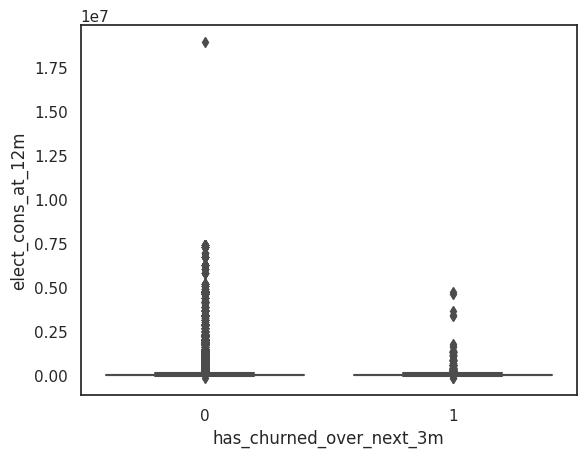

In [16]:
#1
sns.boxplot(data=data, y=data['elect_cons_at_12m'], x='has_churned_over_next_3m')

It seems the electricity consumptions at 12 months is skewed. It also seems there are a lot of outliers when looking at the boxplot. It also indicates 50% of this feature's data is very close to each other. Next we will check for negative values. 

In [17]:
data.loc[data['elect_cons_at_12m']<0]

contract_id                  company_category  \
261    6f7c25ec185db87d3682c7c6c5d0325f                               NaN   
1234   0eebe1192761850edc092783498f3a81                               NaN   
1399   33022492eaff6f16e58d73110dca08e1                               NaN   
1558   d9207ee16592011253eef1bad33e3646                               NaN   
1637   12fb0ca38d63207bc45a868be7e3529d  mpicaaibskkfmxoblmwwwuuwpkecacil   
1668   ed77f450b7a790811a1834bdf49e7126                               NaN   
1750   93ea615efecd4f2e3b5740cc70adc469                               NaN   
2442   3faa5afa12c8f6e068f8ae9c05867e5d                               NaN   
2884   ca4a3b563abd6dc9f57758d79db37540  almlfkoedpwfdmmsebsdwueskducuiok   
3498   5f3bdc07e24de8179b8747d3586c6835                               NaN   
3769   4c6458e5c592d295837751b93545bc14                               NaN   
4432   cfd3670780c3b6c5495eb2497cf9c69b                               NaN   
5600   dd75ef0a087e3a9c9985474486d31309  sxublbwoeuckkocekklxkllcdxxaisop   
5872   80ee96bf919c337005f033962e484d9f  apdekpcbwosbxepsfxclislboipuxpop   
6033   a9075964d47022ae9e36be5707b505f8  idpmdduoieixxoklkufmspokimxcxeid   
7071   f5f6416477d3d02d2a1462ece30f26d8                               NaN   
7819   a518b13ac2966bdc50b459e6849e1669                               NaN   
8399   fc82586d41cb97d393794a172d41242e  klpmksubowwaicwpcmpiioblpxiwkais   
10328  97214bce011dbe96d1cfe1c351378ac2                               NaN   
11878  eb12143d04a1312d82f0a39a5adcf422                               NaN   
12970  dc93ad09f2a88dfd1178615d5658d469                               NaN   
13700  34d993f3a16e766780f61f36a9ef22c1  kwuslieomapmswolewpobpplkaooaaew   

       campaing_code_elect                           channel  \
261                    NaN  ewpakwlliwisiwduibdlfmalxowmwpci   
1234                   NaN                               NaN   
1399                   NaN                               NaN   
1558                   NaN  foosdfpfkusacimwkcsosbicdxkicaua   
1637                   NaN  foosdfpfkusacimwkcsosbicdxkicaua   
1668                   NaN  foosdfpfkusacimwkcsosbicdxkicaua   
1750                   NaN                               NaN   
2442                   NaN                               NaN   
2884                   NaN                               NaN   
3498                   NaN                               NaN   
3769                   NaN  foosdfpfkusacimwkcsosbicdxkicaua   
4432                   NaN  foosdfpfkusacimwkcsosbicdxkicaua   
5600                   NaN  foosdfpfkusacimwkcsosbicdxkicaua   
5872                   NaN  lmkebamcaaclubfxadlmueccxoimlema   
6033                   NaN  foosdfpfkusacimwkcsosbicdxkicaua   
7071                   NaN  foosdfpfkusacimwkcsosbicdxkicaua   
7819                   NaN  lmkebamcaaclubfxadlmueccxoimlema   
8399                   NaN  foosdfpfkusacimwkcsosbicdxkicaua   
10328                  NaN                               NaN   
11878                  NaN                               NaN   
12970                  NaN  usilxuppasemubllopkaafesmlibmsdf   
13700                  NaN  foosdfpfkusacimwkcsosbicdxkicaua   

       elect_cons_at_12m  gas_cons_at_12m  elect_cons_last_month  \
261                 -469                0                    104   
1234              -22385                0                      0   
1399               -3231               15                   2071   
1558                -408             1224                      0   
1637               -1611                0                      0   
1668              -21086                0                      0   
1750                -808             1302                      0   
2442             -147112                0                      0   
2884                -408                0                      0   
3498              -10031                0                      0   
3769             -137343           

Here we will remove the negative values as it does not make sense for an electricity consumption to be negative. There might be exceptions to this if the energy company has a policy or program that allows for energy consumers to also be producers (for instance, if they have solar panels and feed surplus energy back into the grid). In this case I will assume they are not.  

In [18]:
data = data.loc[data['elect_cons_at_12m']>=0]

In [19]:
#2
data['gas_cons_at_12m'].value_counts().head(10)

0          11424
499337        25
443710        20
470972        20
121506        19
239445        16
21232         15
65578         14
243047        13
1001704       13
Name: gas_cons_at_12m, dtype: int64

In [20]:
#2
px.histogram(data['gas_cons_at_12m'], title=f'Histogram of gas_cons_at_12m' )

<Axes: xlabel='has_churned_over_next_3m', ylabel='gas_cons_at_12m'>

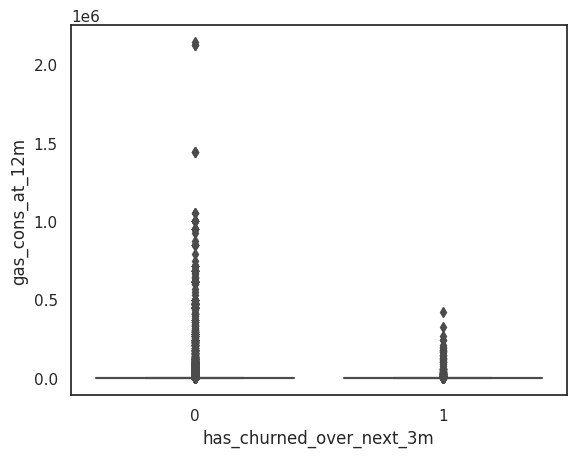

In [21]:
#2
sns.boxplot(data=data, y=data['gas_cons_at_12m'], x='has_churned_over_next_3m')

Conlusions are same as above. 

In [22]:
data.loc[data['gas_cons_at_12m']<0]

contract_id                  company_category  \
2001   f2375ff402484b6d7482a5358c152bd8                               NaN   
2180   291a6f4871cfbd7d178d8f6bc11ec329                               NaN   
2865   c1190f3d5f8d280d7fc70b3ba964d6e2                               NaN   
7794   cd029bf22c3b562bf0d735e95b6426ed  kwuslieomapmswolewpobpplkaooaaew   
11835  f8d5720407a5be0e16506b4a5e0589e1  cluecxlameloamldmasudocsbmaoamdw   
12563  9381c75416e2143ec498f81348c2c9c3                               NaN   

       campaing_code_elect                           channel  \
2001                   NaN                               NaN   
2180                   NaN                               NaN   
2865                   NaN  foosdfpfkusacimwkcsosbicdxkicaua   
7794                   NaN  foosdfpfkusacimwkcsosbicdxkicaua   
11835                  NaN  foosdfpfkusacimwkcsosbicdxkicaua   
12563                  NaN  foosdfpfkusacimwkcsosbicdxkicaua   

       elect_cons_at_12m  gas_cons_at_12m  elect_cons_last_month  \
2001               15172             -245                   1127   
2180                6955             -876                      0   
2865               28797            -1342                   4057   
7794               14220             -879                    621   
11835              87894             -315                   3373   
12563              20132            -1552                   1263   

      contract_activation_date contract_end_date contract_fist_act_date  \
2001                2007-03-07        2017-01-17                    NaN   
2180                2007-03-14        2017-01-17             2007-03-14   
2865                2012-08-10        2016-08-10                    NaN   
7794                2012-07-06        2016-07-06                    NaN   
11835               2013-06-01        2016-06-01                    NaN   
12563               2012-08-31        2016-08-31             2012-08-31   

      contract_last_mod_date contract_renewal_date  \
2001              2007-03-07            2016-01-18   
2180              2007-03-14            2016-01-18   
2865              2012-08-10            2015-08-11   
7794              2012-07-06            2015-07-08   
11835                    NaN            2015-06-09   
12563             2015-07-10            2015-09-01   

       fcst_bill_baseline_elect_next_month  fcst_bill_baseline_elect_cal_year  \
2001                                   NaN                                NaN   
2180                              0.000000                           0.000000   
2865                                   NaN                                NaN   
7794                                   NaN                                NaN   
11835                                  NaN                                NaN   
12563                           232.705895                         436.309735   

       fcst_bill_baseline_elect_12m  fcst_consumption_elect_next_month  \
2001                            NaN                                NaN   
2180                       0.000000                           0.000000   
2865                            NaN                                NaN   
7794                            NaN                                NaN   
11835                           NaN                                NaN   
12563                   4137.571853                         260.760353   

       fcst_consumption_elect_12m  fcst_consumption_elect_cal_year  \
2001                     0.000000                       707.722136   
2180                     0.000000                         0.000000   
2865                  1455.385264                      4927.708428   
7794                   647.800298                       754.964178   
11835                 4120.903327                      4096.430181   
12563                  968.195628                      1535.366380   

       fcst_current_discount  fcst_bill_meter_rent_12m  fcst_price_period_1  \


Again, I will remove those rows as it does not make sense to have negative values for gas consumption. 

In [23]:
data = data.loc[data['gas_cons_at_12m']>=0]

In [24]:
#3
data['elect_cons_last_month'].value_counts().head(10)

 0         4558
 286317      25
 569217      20
 381479      20
 351603      19
 79435       18
 216936      16
 417615      15
 326         15
-46410       14
Name: elect_cons_last_month, dtype: int64

In [25]:
#3
px.histogram(data['elect_cons_last_month'], title=f'Histogram of elect_cons_last_month')

<Axes: xlabel='has_churned_over_next_3m', ylabel='elect_cons_last_month'>

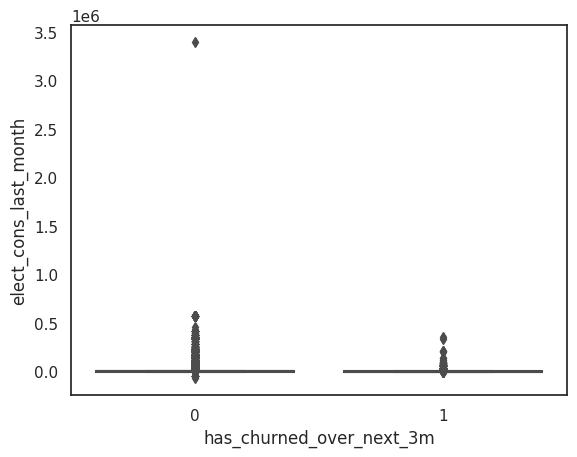

In [26]:
#3
sns.boxplot(data=data, y=data['elect_cons_last_month'], x='has_churned_over_next_3m')

Conlusions are same as above. 

In [27]:
data.loc[data['elect_cons_last_month']<0].head()

contract_id                  company_category  \
280   640be6b6b611728423cb32f8d324ff57  apdekpcbwosbxepsfxclislboipuxpop   
426   7542cc4c0bfd349b2c815bd2e0c0f348  apdekpcbwosbxepsfxclislboipuxpop   
1353  6cd3dcb13e4ab1e5238ccffe572927d6                               NaN   
1449  dc176f89fc4d29b1cec7bc32d4c42079                               NaN   
1515  1f8495049424c1b62244c428b4fc954e  mxokpaemsfodeossocaxbsdsiwfbewux   

      campaing_code_elect                           channel  \
280                   NaN                               NaN   
426                   NaN                               NaN   
1353                  NaN                               NaN   
1449                  NaN  foosdfpfkusacimwkcsosbicdxkicaua   
1515                  NaN  foosdfpfkusacimwkcsosbicdxkicaua   

      elect_cons_at_12m  gas_cons_at_12m  elect_cons_last_month  \
280             4418159            65578                 -46410   
426             4418159            65578                 -46410   
1353            4418159            65578                 -46410   
1449              17108                0                   -851   
1515              30260                0                  -3627   

     contract_activation_date contract_end_date contract_fist_act_date  \
280                2007-04-20        2016-07-23                    NaN   
426                2007-04-24        2016-07-23                    NaN   
1353               2009-09-07        2016-11-13                    NaN   
1449               2013-02-20        2016-05-09                    NaN   
1515               2012-03-12        2016-03-12                    NaN   

     contract_last_mod_date contract_renewal_date  \
280              2015-06-17            2015-07-26   
426              2015-06-17            2015-07-26   
1353             2013-11-14            2015-11-17   
1449             2014-05-09            2015-05-14   
1515             2013-10-31            2015-03-18   

      fcst_bill_baseline_elect_next_month  fcst_bill_baseline_elect_cal_year  \
280                                   NaN                                NaN   
426                                   NaN                                NaN   
1353                                  NaN                                NaN   
1449                                  NaN                                NaN   
1515                                  NaN                                NaN   

      fcst_bill_baseline_elect_12m  fcst_consumption_elect_next_month  \
280                            NaN                                NaN   
426                            NaN                                NaN   
1353                           NaN                                NaN   
1449                           NaN                                NaN   
1515                           NaN                                NaN   

      fcst_consumption_elect_12m  fcst_consumption_elect_cal_year  \
280                  1547.036704                         0.000000   
426                  2697.352795                         0.000000   
1353                 2056.584765                         0.000000   
1449                 1028.894906                     -1033.873929   
1515                 2176.523686                     -4405.320459   

      fcst_current_discount  fcst_bill_meter_rent_12m  fcst_price_period_1  \
280                0.000000                 92.893684             0.123885   
426                0.000000                106.448452             0.139416   
1353               0.000000                  9.423396             0.204019   
1449              12.368383                 89.052476             0.186997   
1515               0.000000                 14.881228             0.181764   

      fcst_price_period_2  fcst_price_power_period_1 client_got_gas  \
280              0.045632                  39.720589              t   
426              0.047994                  27.339538              t   
1353   

Removing negative values

In [28]:
data = data.loc[data['elect_cons_last_month']>=0]

In [29]:
#4 
data['fcst_consumption_elect_12m'].value_counts().head(10)

0.000000      286
0.084862        5
214.911312      3
189.809001      3
368.421816      3
623.405174      3
171.948285      3
234.865301      3
870.898007      3
0.254587        3
Name: fcst_consumption_elect_12m, dtype: int64

In [30]:
#4
px.histogram(data['fcst_consumption_elect_12m'], title=f'Histogram of fcst_consumption_elect_12m')

<Axes: xlabel='has_churned_over_next_3m', ylabel='fcst_consumption_elect_12m'>

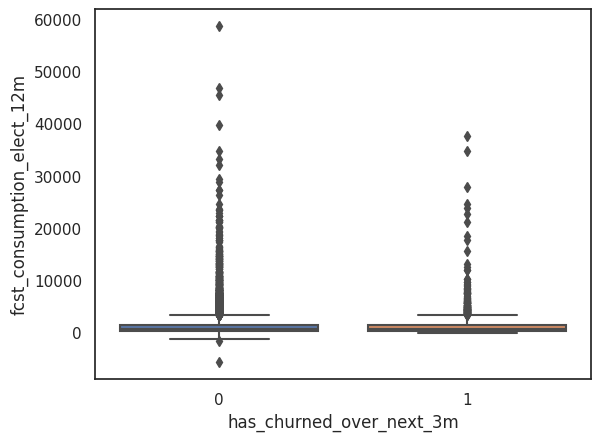

In [31]:
#4
sns.boxplot(data=data, y=data['fcst_consumption_elect_12m'], x='has_churned_over_next_3m')

Conlusions same as above.

In [32]:
data.loc[data['fcst_consumption_elect_12m']<0].head()

contract_id                  company_category  \
710   0c4fff73bf5529077588adee152cc39e  apdekpcbwosbxepsfxclislboipuxpop   
1663  1aa5951da90eb21db41a69663e6b9f90                               NaN   
5166  ca2ac4600beafeec0742efbf7e006efc  apdekpcbwosbxepsfxclislboipuxpop   
5699  27276020e48d73f589788d4e37c51879  ibkiiwcxiccxpoedpweiuxwbxbuewbxm   
5805  5239eb6205a6318c14741c1622e4d66a                               NaN   

      campaing_code_elect                           channel  \
710                   NaN  lmkebamcaaclubfxadlmueccxoimlema   
1663                  NaN  foosdfpfkusacimwkcsosbicdxkicaua   
5166                  NaN  lmkebamcaaclubfxadlmueccxoimlema   
5699                  NaN  foosdfpfkusacimwkcsosbicdxkicaua   
5805                  NaN  ewpakwlliwisiwduibdlfmalxowmwpci   

      elect_cons_at_12m  gas_cons_at_12m  elect_cons_last_month  \
710             1119217                0                  51180   
1663              50113                0                   2920   
5166             180165                0                  18955   
5699             456305           342629                  26428   
5805              14711                0                   1766   

     contract_activation_date contract_end_date contract_fist_act_date  \
710                2010-06-04        2016-06-04                    NaN   
1663               2013-02-01        2016-10-18                    NaN   
5166               2010-06-04        2016-06-04                    NaN   
5699               2012-12-17        2016-12-17                    NaN   
5805               2013-06-07        2016-03-11                    NaN   

     contract_last_mod_date contract_renewal_date  \
710              2010-06-04            2015-06-23   
1663             2013-11-08            2015-10-19   
5166             2010-06-04            2015-06-08   
5699             2015-11-01            2015-12-18   
5805             2014-03-11            2015-03-13   

      fcst_bill_baseline_elect_next_month  fcst_bill_baseline_elect_cal_year  \
710                                   NaN                                NaN   
1663                                  NaN                                NaN   
5166                                  NaN                                NaN   
5699                                  NaN                                NaN   
5805                                  NaN                                NaN   

      fcst_bill_baseline_elect_12m  fcst_consumption_elect_next_month  \
710                            NaN                                NaN   
1663                           NaN                                NaN   
5166                           NaN                                NaN   
5699                           NaN                                NaN   
5805                           NaN                                NaN   

      fcst_consumption_elect_12m  fcst_consumption_elect_cal_year  \
710                 -5697.392956                         0.000000   
1663                 -124.911861                         0.000000   
5166                -1560.246957                         0.000000   
5699                  -34.063785                         0.000000   
5805                 -300.101891                      2144.970428   

      fcst_current_discount  fcst_bill_meter_rent_12m  fcst_price_period_1  \
710                     0.0                  0.753043             0.183733   
1663                    0.0                  9.492483             0.183733   
5166                    0.0                  1.181379             0.207598   
5699                    0.0                  8.483820             0.183813   
5805                    0.0                  0.000000             0.000757   

      fcst_price_period_2  fcst_price_power_period_1 client_got_gas  \
710              0.000000                  29.744311              f   
1663             0.000000                  29.744311              f   
5166   

I remove negative values.

In [33]:
# here we delete those rows
data = data.loc[data['fcst_consumption_elect_12m']>=0]

In [34]:
#5
data['fcst_consumption_elect_cal_year'].value_counts().head(10)

0.000000      5598
7.268007        14
411.550870      11
0.908501        10
381.570343      10
6.359506        10
300.713770      10
391.563852      10
30.889028       10
414.276372       9
Name: fcst_consumption_elect_cal_year, dtype: int64

In [35]:
#5
px.histogram(data['fcst_consumption_elect_cal_year'], title=f'Histogram of fcst_consumption_elect_cal_year')

<Axes: xlabel='has_churned_over_next_3m', ylabel='fcst_consumption_elect_cal_year'>

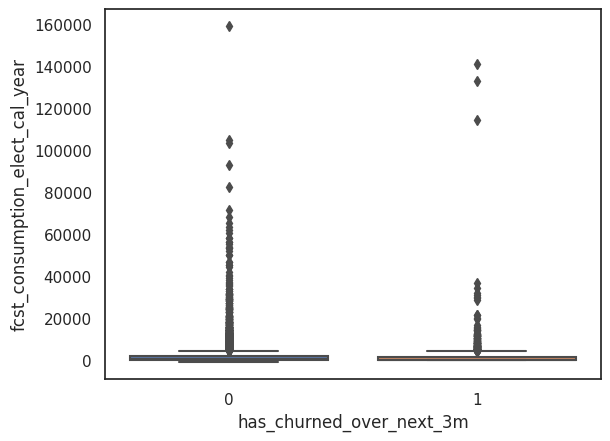

In [36]:
#5
sns.boxplot(data=data, y=data['fcst_consumption_elect_cal_year'], x='has_churned_over_next_3m')

Conclusions same as above. We delete negative values in the next code cell. 

In [37]:
# here we delete those rows
data = data.loc[data['fcst_consumption_elect_cal_year']>=0]

In [38]:
#6
data['fcst_bill_meter_rent_12m'].value_counts().head(10)

0.000000      712
91.028349     239
12.656644     142
12.691187     109
89.542990     103
248.193187     90
11.040020      85
89.536081      71
90.765820      70
11.233462      67
Name: fcst_bill_meter_rent_12m, dtype: int64

In [39]:
#6
px.histogram(data['fcst_bill_meter_rent_12m'], title=f'Histogram of fcst_bill_meter_rent_12m')

<Axes: xlabel='has_churned_over_next_3m', ylabel='fcst_bill_meter_rent_12m'>

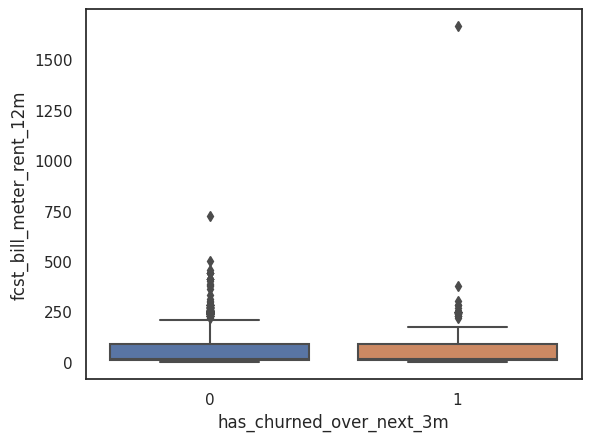

In [40]:
#6
sns.boxplot(data=data, y=data['fcst_bill_meter_rent_12m'], x='has_churned_over_next_3m')

There seems to be a bimodal distribution for this variable and values seem to be more spread within the 1st and 3rd quartile. There might be a need to investigate this but for now I will continue the analysis. Next I will check negative values. 

In [41]:
data.loc[data['fcst_bill_meter_rent_12m']<0]

contract_id                  company_category  \
8329  56c376b382c0a9f8b034eae409921ea0  kkpddsilciodwwwffucmkflilcpfaumo   

      campaing_code_elect                           channel  \
8329                  NaN  foosdfpfkusacimwkcsosbicdxkicaua   

      elect_cons_at_12m  gas_cons_at_12m  elect_cons_last_month  \
8329              17329              842                      0   

     contract_activation_date contract_end_date contract_fist_act_date  \
8329               2011-02-10        2016-02-10                    NaN   

     contract_last_mod_date contract_renewal_date  \
8329             2015-12-15            2015-02-11   

      fcst_bill_baseline_elect_next_month  fcst_bill_baseline_elect_cal_year  \
8329                                  NaN                                NaN   

      fcst_bill_baseline_elect_12m  fcst_consumption_elect_next_month  \
8329                           NaN                                NaN   

      fcst_consumption_elect_12m  fcst_consumption_elect_cal_year  \
8329                 1240.666307                              0.0   

      fcst_current_discount  fcst_bill_meter_rent_12m  fcst_price_period_1  \
8329                    0.0                 -0.345432              0.18104   

      fcst_price_period_2  fcst_price_power_period_1 client_got_gas  \
8329                  0.0                  29.744311              t   

      current_paid_consumption  gross_margin_power_elect  \
8329                       0.0                 52.611264   

      net_margin_power_elect  number_active_products  total_net_margin  \
8329               47.571783                     2.0         102.39469   

      customer_antiquity_in_years    code_elect_campaign_first_subs  \
8329                          5.0  lxidpiddsbxsbosboudacockeimpuepw   

      subscribed_power  has_churned_over_next_3m  
8329         18.778509                         1

We remove negative values.

In [42]:
data = data.loc[data['fcst_bill_meter_rent_12m']>=0]

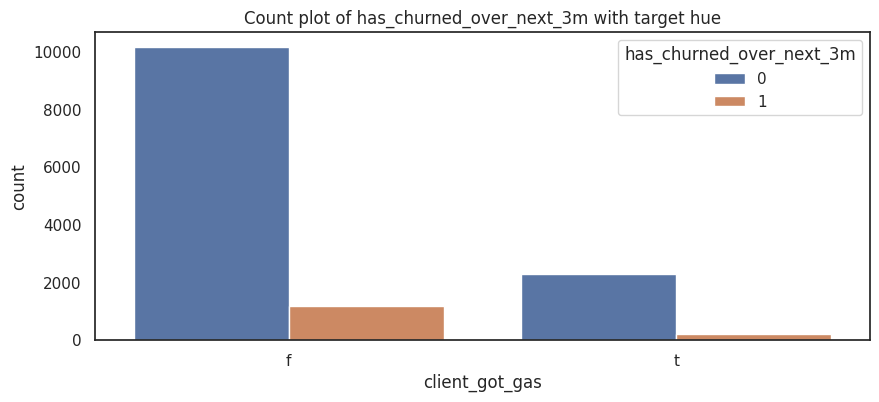

In [43]:
#7
plt.figure(figsize=(10, 4))
sns.countplot(data=data, x='client_got_gas', hue='has_churned_over_next_3m')  # replace 'target' with your target column
plt.title(f'Count plot of {column} with target hue')
plt.show()

It seems that EnergyInc has more clients who do not consume gas overall. Therefore it seems more people leave the company when they do not have gas but this is also valid for those who stay clients of EnergyInc.

In [44]:
#8
data['current_paid_consumption'].value_counts().head(10)

0.000000      5619
0.069266         4
23.917687        4
18.189356        4
48.264827        4
0.207799         4
18.362522        4
145.729576       3
50.183506        3
11.041064        3
Name: current_paid_consumption, dtype: int64

In [45]:
#8
px.histogram(data['current_paid_consumption'], title=f'Histogram of current_paid_consumption')

<Axes: xlabel='has_churned_over_next_3m', ylabel='current_paid_consumption'>

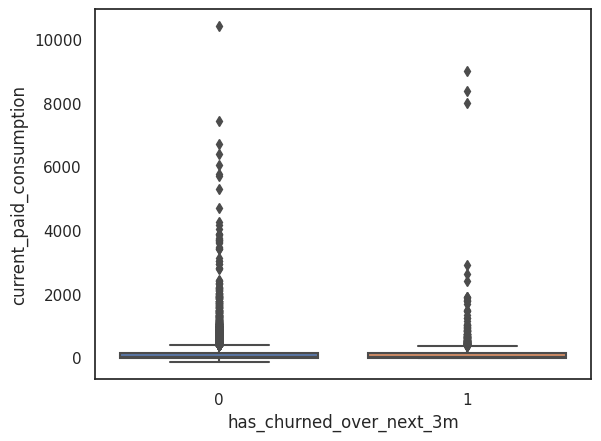

In [46]:
#8
sns.boxplot(data=data, y=data['current_paid_consumption'], x='has_churned_over_next_3m')

Conclusions same as above. We will check negative values. 

In [47]:
data.loc[data['current_paid_consumption']<0]

contract_id company_category  campaing_code_elect  \
128  e6858b76c83d66ff00ca323d62531c64              NaN                  NaN   
408  7928d1b4430517a4e41f04ed4ad0f3fe              NaN                  NaN   

                              channel  elect_cons_at_12m  gas_cons_at_12m  \
128  usilxuppasemubllopkaafesmlibmsdf                  0                0   
408  foosdfpfkusacimwkcsosbicdxkicaua                  0                0   

     elect_cons_last_month contract_activation_date contract_end_date  \
128                      0               2011-01-03        2017-01-03   
408                      0               2009-09-16        2016-09-16   

    contract_fist_act_date contract_last_mod_date contract_renewal_date  \
128                    NaN             2015-11-18            2016-01-04   
408                    NaN             2015-07-12            2015-09-17   

     fcst_bill_baseline_elect_next_month  fcst_bill_baseline_elect_cal_year  \
128                                  NaN                                NaN   
408                                  NaN                                NaN   

     fcst_bill_baseline_elect_12m  fcst_consumption_elect_next_month  \
128                           NaN                                NaN   
408                           NaN                                NaN   

     fcst_consumption_elect_12m  fcst_consumption_elect_cal_year  \
128                  496.015330                              0.0   
408                  715.594076                              0.0   

     fcst_current_discount  fcst_bill_meter_rent_12m  fcst_price_period_1  \
128                    0.0                       0.0             0.199214   
408                    0.0                       0.0             0.203954   

     fcst_price_period_2  fcst_price_power_period_1 client_got_gas  \
128             0.041049                  29.744311              f   
408             0.043305                  29.744311              f   

     current_paid_consumption  gross_margin_power_elect  \
128               -142.072310                  40.29799   
408                -85.821068                  15.67144   

     net_margin_power_elect  number_active_products  total_net_margin  \
128               36.437961                     1.0         52.802681   
408               14.170318                     1.0         38.969043   

     customer_antiquity_in_years    code_elect_campaign_first_subs  \
128                          5.0  ldkssxwpmemidmecebumciepifcamkci   
408                          6.0  kamkkxfxxuwbdslkwifmmcsiusiuosws   

     subscribed_power  has_churned_over_next_3m  
128         12.957171                         0  
408         13.009751                         0

We delete negative values.

In [48]:
data = data.loc[data['current_paid_consumption']>=0]

In [49]:
#9
data['number_active_products'].value_counts().head(10)

1.0     10860
2.0      2311
3.0       467
4.0       144
5.0        33
32.0       20
9.0        12
8.0         6
6.0         5
31.0        4
Name: number_active_products, dtype: int64

In [50]:
#9
px.histogram(data['number_active_products'], title=f'Histogram of number_active_products')

<Axes: xlabel='has_churned_over_next_3m', ylabel='number_active_products'>

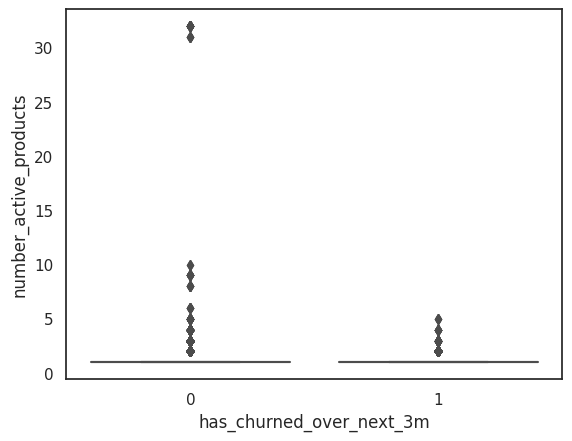

In [51]:
#9
sns.boxplot(data=data, y=data['number_active_products'], x='has_churned_over_next_3m')

Same conclusions as above. We will check negative values. 

In [52]:
data.loc[data['number_active_products']<0]

Empty DataFrame
Columns: [contract_id, company_category, campaing_code_elect, channel, elect_cons_at_12m, gas_cons_at_12m, elect_cons_last_month, contract_activation_date, contract_end_date, contract_fist_act_date, contract_last_mod_date, contract_renewal_date, fcst_bill_baseline_elect_next_month, fcst_bill_baseline_elect_cal_year, fcst_bill_baseline_elect_12m, fcst_consumption_elect_next_month, fcst_consumption_elect_12m, fcst_consumption_elect_cal_year, fcst_current_discount, fcst_bill_meter_rent_12m, fcst_price_period_1, fcst_price_period_2, fcst_price_power_period_1, client_got_gas, current_paid_consumption, gross_margin_power_elect, net_margin_power_elect, number_active_products, total_net_margin, customer_antiquity_in_years, code_elect_campaign_first_subs, subscribed_power, has_churned_over_next_3m]
Index: []

There are none so we are good. 

In [53]:
#10
data['customer_antiquity_in_years'].value_counts().head(15)

6.0     4338
4.0     3725
3.0     2379
5.0     2155
7.0      570
11.0     205
8.0      170
12.0     115
10.0      97
9.0       87
13.0      11
2.0       10
16.0       1
15.0       1
Name: customer_antiquity_in_years, dtype: int64

In [54]:
#10
px.histogram(data['customer_antiquity_in_years'], title=f'Histogram of customer_antiquity_in_years')

<Axes: xlabel='has_churned_over_next_3m', ylabel='customer_antiquity_in_years'>

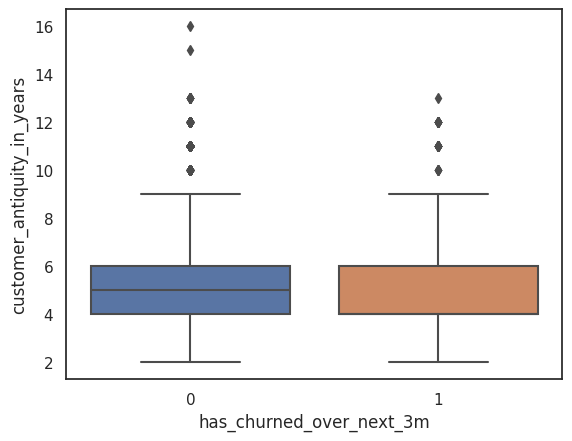

In [55]:
#10
sns.boxplot(data=data, y=data['customer_antiquity_in_years'], x='has_churned_over_next_3m')

The distribution of the customer antiquity in years seems to be mostly centered around 3 to 7 years. For this variable it seems the data is less compressed within the 1st and 3rd quartile, with less outliers. Let's check for negative values.

In [56]:
data.loc[data['customer_antiquity_in_years']<0]

Empty DataFrame
Columns: [contract_id, company_category, campaing_code_elect, channel, elect_cons_at_12m, gas_cons_at_12m, elect_cons_last_month, contract_activation_date, contract_end_date, contract_fist_act_date, contract_last_mod_date, contract_renewal_date, fcst_bill_baseline_elect_next_month, fcst_bill_baseline_elect_cal_year, fcst_bill_baseline_elect_12m, fcst_consumption_elect_next_month, fcst_consumption_elect_12m, fcst_consumption_elect_cal_year, fcst_current_discount, fcst_bill_meter_rent_12m, fcst_price_period_1, fcst_price_period_2, fcst_price_power_period_1, client_got_gas, current_paid_consumption, gross_margin_power_elect, net_margin_power_elect, number_active_products, total_net_margin, customer_antiquity_in_years, code_elect_campaign_first_subs, subscribed_power, has_churned_over_next_3m]
Index: []

No negative values so we are good. 

**For now I will assume that negative values are not possible for bills and forecasted energy consumption and therefore keep the rows I removed outside of my final dataframe.**

### Drop columns Null values OR columns that are not going to be used.

In [57]:
# dropping 'campaing_code_elect' because no values in the column
# dropping 'contract_activation_date' and others date related features as I am not going to use them. They also have a lot of null values.
# dropping the rest because of high number of null values (12588/16096 = 78.2% of total data)
data = data.drop(columns = ['campaing_code_elect', 'contract_fist_act_date',
                     'fcst_bill_baseline_elect_next_month', 'fcst_bill_baseline_elect_cal_year',
                    'fcst_bill_baseline_elect_12m','fcst_consumption_elect_next_month', 
                           'contract_end_date','contract_last_mod_date', 'contract_renewal_date','contract_activation_date' ])
# dropping the same columns in test_set
test_data  = test_data.drop(columns = ['campaing_code_elect', 'contract_fist_act_date',
                     'fcst_bill_baseline_elect_next_month', 'fcst_bill_baseline_elect_cal_year',
                    'fcst_bill_baseline_elect_12m','fcst_consumption_elect_next_month', 
                                      'contract_end_date','contract_last_mod_date', 'contract_renewal_date','contract_activation_date' ])

## Splitting train data into sub_train and validation set

In [58]:
#not removing contract_id now for feature engineering purposes
X_train = data.drop(columns= ['has_churned_over_next_3m'])
y_train = data['has_churned_over_next_3m']

In [59]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

## Feature engineering 

In [60]:
# sub-selecting the historical prices for the validation and sub_train set

In [61]:
sub_train_hist = train_hist[train_hist['contract_id'].isin(X_train['contract_id'])]
val_hist = train_hist[train_hist['contract_id'].isin(X_val['contract_id'])]

In [62]:
sub_train_hist = sub_train_hist.sort_values(by = ['contract_id', 'reference_date'])
val_hist = val_hist.sort_values(by = ['contract_id', 'reference_date'])

In [63]:
features = ['price_energy_1st_period','price_power_1st_period','price_energy_2nd_period', 'price_energy_3rd_period',
                 'price_power_2nd_period', 'price_power_3rd_period']

for feature in features:
    print(f'mean: {sub_train_hist[feature].mean()}, median: {sub_train_hist[feature].median()}, mode: {sub_train_hist[feature].mode()}')
    fig = px.histogram(sub_train_hist, x=feature)
    fig.show()

mean: 0.12743842510259132, median: 0.1320357822072031, mode: 0    0.137833
Name: price_energy_1st_period, dtype: float64


mean: 39.06276008264604, median: 39.92685526405122, mode: 0    40.087205
Name: price_power_1st_period, dtype: float64


mean: 0.043080325221945014, median: 0.0678126124494463, mode: 0    0.0
Name: price_energy_2nd_period, dtype: float64


mean: 0.039233888319659446, median: 0.0, mode: 0    0.0
Name: price_energy_3rd_period, dtype: float64


mean: 8.104557736734073, median: 0.0, mode: 0    0.0
Name: price_power_2nd_period, dtype: float64


mean: 4.905917618188672, median: 0.0, mode: 0    0.0
Name: price_power_3rd_period, dtype: float64


As seen in the distributions above, it seems like using the mean for the features 'price_power_1st_period' and 'price_energy_1st_period' would be a good idea as the distributions do not seem skewed and all of the metrics are close to each other. For the rest, they are skewed with more than half the data being 0, in this case it would make more sense to impute NaN values with the mode since it represents the most common value.

In [64]:
# defining features
mean_features = ['price_energy_1st_period','price_power_1st_period']

mode_features = ['price_energy_2nd_period', 'price_energy_3rd_period',
                 'price_power_2nd_period', 'price_power_3rd_period']

# Compute and store the overall means from the training data
mean_values = sub_train_hist[mean_features].mean()
mode_values = sub_train_hist[mode_features].mode()

# Fill missing values in the training data with the corresponding mean
for feature in mean_features:
    sub_train_hist[feature] = sub_train_hist[feature].fillna(mean_values[feature])
    
for feature in mode_features:
    sub_train_hist[feature] = sub_train_hist[feature].fillna(float(mode_values[feature]))

# Use the stored mean values to fill missing values in the test data
for feature in mean_features:
    val_hist[feature] = val_hist[feature].fillna(mean_values[feature])
    
for feature in mode_features:
    val_hist[feature] = val_hist[feature].fillna(float(mode_values[feature]))

In [65]:
# 1. Statistical features

# Store the initial dataframes to prevent unwanted overwriting
data_original = data.copy()
test_data_original = test_data.copy()

# new features
features = ['price_energy_1st_period','price_power_1st_period','price_energy_2nd_period', 'price_energy_3rd_period',
                 'price_power_2nd_period', 'price_power_3rd_period']

# feature engineering on train data
train_features = []
for period in features:
    stats_df = sub_train_hist.groupby('contract_id')[period].agg(['mean', 'median', 'max', 'min', 'std']).reset_index()
    stats_df.columns = ['contract_id'] + [f'{period}_{stat}' for stat in ['mean', 'median', 'max', 'min', 'std']]
    train_features.append(stats_df)

# Merge all feature dataframes together
for feature_df in train_features:
    X_train = X_train.merge(feature_df, on='contract_id', how='left')

# feature engineering on test data
test_features = []
for period in features:
    stats_df = val_hist.groupby('contract_id')[period].agg(['mean', 'median', 'max', 'min', 'std']).reset_index()
    stats_df.columns = ['contract_id'] + [f'{period}_{stat}' for stat in ['mean', 'median', 'max', 'min', 'std']]
    test_features.append(stats_df)

# Merge all feature dataframes together
for feature_df in test_features:
    X_val = X_val.merge(feature_df, on='contract_id', how='left')

In [66]:
# 2. Average change of prices over time

# feature engineering on train data
for period in features:
    sub_train_hist[f'{period}_diff'] = sub_train_hist.groupby('contract_id')[period].diff()
    sub_train_hist[f'{period}_pct_change'] = sub_train_hist.groupby('contract_id')[period].pct_change()
    avg_diff_df = sub_train_hist.groupby('contract_id')[f'{period}_diff'].mean().reset_index()
    avg_pct_change_df = sub_train_hist.groupby('contract_id')[f'{period}_pct_change'].mean().reset_index()
    X_train = X_train.merge(avg_diff_df, on='contract_id', how='left')
    X_train = X_train.merge(avg_pct_change_df, on='contract_id', how='left')

# feature engineering on test data    
for period in features:
    val_hist[f'{period}_diff'] = val_hist.groupby('contract_id')[period].diff()
    val_hist[f'{period}_pct_change'] = val_hist.groupby('contract_id')[period].pct_change()
    avg_diff_df = val_hist.groupby('contract_id')[f'{period}_diff'].mean().reset_index()
    avg_pct_change_df = val_hist.groupby('contract_id')[f'{period}_pct_change'].mean().reset_index()
    X_val = X_val.merge(avg_diff_df, on='contract_id', how='left')
    X_val = X_val.merge(avg_pct_change_df, on='contract_id', how='left')

After this operation, there are some infinite values given that, as we are calculating the percent change, when the previous value (the denominator of the percent change calculation) is zero, the result becomes infinite. We will therefore set those values to 0 for simplicity for this exercice.

In [67]:
# Select only numeric columns
numeric_columns = X_train.select_dtypes(include=[np.number])

# Create a boolean mask for infinite values
infinite_mask = np.isinf(numeric_columns)

# Find the rows in the original dataframe where there are infinite values in the numeric columns
X_train[infinite_mask.any(axis=1)].head()

contract_id                  company_category  \
37   a6387d37974174ec1cfd0694d956cb5d  alkuukubieaxcobeeowowmokpbilomax   
473  8cd2edbbd2e22e91731ed92524716fcb  fmwdwsxillemwbbwelxsampiuwwpcdcb   
536  b86c5461640fafb75ea7ff46d67ffe73  fkmblacmaapkaoauabpwpuweokkeiali   
617  e0db09e4bcd2c09604a9462a5b4322f9  sxublbwoeuckkocekklxkllcdxxaisop   
748  a1fce02507c46fb3686c7b880efc5b0a                               NaN   

                              channel  elect_cons_at_12m  gas_cons_at_12m  \
37   foosdfpfkusacimwkcsosbicdxkicaua             152430               75   
473                               NaN              47807            28443   
536                               NaN             147835                0   
617  foosdfpfkusacimwkcsosbicdxkicaua              68451                0   
748  foosdfpfkusacimwkcsosbicdxkicaua               1535                0   

     elect_cons_last_month  fcst_consumption_elect_12m  \
37                    9311                 1027.514477   
473                   2211                 2347.193377   
536                   7365                  889.550772   
617                   3310                  763.931724   
748                      0                   70.034147   

     fcst_consumption_elect_cal_year  fcst_current_discount  \
37                          0.000000                    0.0   
473                      2686.436914                    0.0   
536                      2756.391477                    0.0   
617                      1326.411192                    0.0   
748                         0.000000                    0.0   

     fcst_bill_meter_rent_12m  fcst_price_period_1  fcst_price_period_2  \
37                  94.358317             0.138661             0.047989   
473                 93.950707             0.147404             0.051262   
536                 90.703642             0.144495             0.050078   
617                 51.745775             0.199095             0.067804   
748                 11.116015             0.209055             0.045380   

     fcst_price_power_period_1 client_got_gas  current_paid_consumption  \
37                   27.257522              t                  0.000000   
473                  27.257522              t                203.442340   
536                  27.257522              f                156.860686   
617                  27.592143              f                137.272149   
748                  29.744311              f                  0.000000   

     gross_margin_power_elect  net_margin_power_elect  number_active_products  \
37                 -10.261062               -9.278185                     2.0   
473                 46.081498               41.667483                     2.0   
536                 34.887611               31.545828                     1.0   
617                 70.614764               63.850779                     1.0   
748                 12.064522               10.908896                     1.0   

     total_net_margin  customer_antiquity_in_years  \
37          63.559426                          4.0   
473        243.173764                         11.0   
536         90.513220                         11.0   
617        191.743546                          3.0   
748          6.867272                          6.0   

       code_elect_campaign_first_subs  subscribed_power  \
37   lxidpiddsbxsbosboudacockeimpuepw         50.076024   
473  ldkssxwpmemidmecebumciepifcamkci         24.787632   
536  ldkssxwpmemidmecebumciepifcamkci         18.779761   
617  lxidpiddsbxsbosboudacockeimpuepw         21.684170   
748  kamkkxfxxuwbdslkwifmmcsiusiuosws         12.957171   

     price_energy_1st_period_mean  price_energy_1st_period_median  \
37                       0.112921                        0.111681   
473                      0.121388                        0.121388   
536                      0.118381                        0.114012   
617                      0.137367      

## Handle features with null values

In [68]:
# these are the columns with null values which we will handle now 
null_col

['company_category',
 'campaing_code_elect',
 'channel',
 'contract_end_date',
 'contract_fist_act_date',
 'contract_last_mod_date',
 'contract_renewal_date',
 'fcst_bill_baseline_elect_next_month',
 'fcst_bill_baseline_elect_cal_year',
 'fcst_bill_baseline_elect_12m',
 'fcst_consumption_elect_next_month',
 'fcst_consumption_elect_12m',
 'fcst_consumption_elect_cal_year',
 'fcst_current_discount',
 'fcst_bill_meter_rent_12m',
 'fcst_price_period_1',
 'fcst_price_period_2',
 'fcst_price_power_period_1',
 'client_got_gas',
 'current_paid_consumption',
 'gross_margin_power_elect',
 'net_margin_power_elect',
 'number_active_products',
 'total_net_margin',
 'customer_antiquity_in_years',
 'code_elect_campaign_first_subs',
 'subscribed_power']

### Handle Null values (deleting rows OR imputing values)

In [69]:
# this code changes the unknown value for company to a string indicating it is unknown
# I am not dropping these rows as having an unknown category might contain relevant information in the model
X_train['company_category'] = X_train['company_category'].fillna('cat_unknown')

#doing the same in test_data
X_val['company_category'] = X_val['company_category'].fillna('cat_unknown')

In [70]:
# this code changes the unknown value for channels to a string indicating it is unknown
# I am not dropping these rows as having an unknown channel might contain relevant information in the model
X_train['channel'] = X_train['channel'].fillna('channel_unknown')

# doing the same in test data
X_val['channel'] = X_val['channel'].fillna('channel_unknown')

In [71]:
# I will impute the forecasted current discount with the columns' median as we can see it is heavily skewed towards 
# the value 0. It wouldn't make much sense to impute them with the mean as it woulnd't represent the feature's
# distribution
px.histogram(X_train['fcst_current_discount'])

In [72]:
# here we fill the NaN with the median
X_train['fcst_current_discount'] = X_train['fcst_current_discount'].fillna(X_train['fcst_current_discount'].median())

# we do the same using the value from train data
X_val['fcst_current_discount'] = X_val['fcst_current_discount'].fillna(X_train['fcst_current_discount'].median())

In [73]:
px.histogram(X_train['fcst_price_period_1'])
# here we can see that the forecasted price for period 1 seems to have trimodal distirbution

In [74]:
X_train['fcst_price_period_1'].mean()

0.17117273661558519

In [75]:
X_train['fcst_price_period_1'].median()

0.1801647674464923

In [76]:
X_train['fcst_price_period_1'].mode()

0    0.183733
Name: fcst_price_period_1, dtype: float64

The three metrics are very similar and eventhough this is a trimodal distribution and there might be some more analysis needed, I will impute the missing value with the mean. 

In [77]:
X_train['fcst_price_period_1'] = X_train['fcst_price_period_1'].fillna(X_train['fcst_price_period_1'].mean())

# we do the same for the test data using the train data mena
X_val['fcst_price_period_1'] = X_val['fcst_price_period_1'].fillna(X_train['fcst_price_period_1'].mean())

For now, I will not investigate the trimodality of this variable. I will just scale it later like the rest of them. 

In [78]:
px.histogram(X_train['fcst_price_period_2'])
# here we cann see that a lot of values are 0 but the rest seems to be centered around 0.05

In [79]:
X_train['fcst_price_period_2'].mean()

0.027152626469110732

In [80]:
X_train['fcst_price_period_2'].median()

0.0441623037968959

In [81]:
X_train['fcst_price_period_2'].mode()

0    0.0
Name: fcst_price_period_2, dtype: float64

I will use the mean to impute the missing values since the feature's values are discrete and, eventhough there a lot of 0's, it seems like the mean is between the mode and median which is, according to me a good imputation metric to use in this case. 

In [82]:
X_train['fcst_price_period_2'] = X_train['fcst_price_period_2'].fillna(X_train['fcst_price_period_2'].mean())

# we do the same for the test data using the value from train data
X_val['fcst_price_period_2'] = X_val['fcst_price_period_2'].fillna(X_train['fcst_price_period_2'].mean())

In [83]:
X_train.loc[X_train['fcst_price_period_2'].isna()].head()

Empty DataFrame
Columns: [contract_id, company_category, channel, elect_cons_at_12m, gas_cons_at_12m, elect_cons_last_month, fcst_consumption_elect_12m, fcst_consumption_elect_cal_year, fcst_current_discount, fcst_bill_meter_rent_12m, fcst_price_period_1, fcst_price_period_2, fcst_price_power_period_1, client_got_gas, current_paid_consumption, gross_margin_power_elect, net_margin_power_elect, number_active_products, total_net_margin, customer_antiquity_in_years, code_elect_campaign_first_subs, subscribed_power, price_energy_1st_period_mean, price_energy_1st_period_median, price_energy_1st_period_max, price_energy_1st_period_min, price_energy_1st_period_std, price_power_1st_period_mean, price_power_1st_period_median, price_power_1st_period_max, price_power_1st_period_min, price_power_1st_period_std, price_energy_2nd_period_mean, price_energy_2nd_period_median, price_energy_2nd_period_max, price_energy_2nd_period_min, price_energy_2nd_period_std, price_energy_3rd_period_mean, price_energy_3rd_period_median, price_energy_3rd_period_max, price_energy_3rd_period_min, price_energy_3rd_period_std, price_power_2nd_period_mean, price_power_2nd_period_median, price_power_2nd_period_max, price_power_2nd_period_min, price_power_2nd_period_std, price_power_3rd_period_mean, price_power_3rd_period_median, price_power_3rd_period_max, price_power_3rd_period_min, price_power_3rd_period_std, price_energy_1st_period_diff, price_energy_1st_period_pct_change, price_power_1st_period_diff, price_power_1st_period_pct_change, price_energy_2nd_period_diff, price_energy_2nd_period_pct_change, price_energy_3rd_period_diff, price_energy_3rd_period_pct_change, price_power_2nd_period_diff, price_power_2nd_period_pct_change, price_power_3rd_period_diff, price_power_3rd_period_pct_change]
Index: []

[0 rows x 64 columns]

For now, I will not investigate the particular dsitribution of this variable. I will just scale it later like the rest of them.

In [84]:
px.histogram(X_train['fcst_price_power_period_1'])

In [85]:
X_train['fcst_price_power_period_1'].median()

29.744310877528388

In [86]:
X_train['fcst_price_power_period_1'].mean()

29.195316950671458

It seems the data is weirdly distributed but the mean and median are very similar. I will therefore impute the ,null values with the mean. 

In [87]:
X_train['fcst_price_power_period_1'] = X_train['fcst_price_power_period_1'].fillna(X_train['fcst_price_power_period_1'].mean())

# we do the same for the test data using the train set value
X_val['fcst_price_power_period_1'] = X_val['fcst_price_power_period_1'].fillna(X_train['fcst_price_power_period_1'].mean())

In [88]:
px.histogram(X_train['gross_margin_power_elect'])

This variable seems to be more or less normally distributed. Let's check the different measures of central tendency. 

In [89]:
X_train['gross_margin_power_elect'].mean()

34.92503456702666

In [90]:
X_train['gross_margin_power_elect'].median()

32.57109896506067

In [91]:
X_train['gross_margin_power_elect'].mode()

0    40.484555
Name: gross_margin_power_elect, dtype: float64

In this case I will take the mean to impute the missing values. 

In [92]:
X_train['gross_margin_power_elect'] = X_train['gross_margin_power_elect'].fillna(X_train['gross_margin_power_elect'].mean())

# we do the same to the test_data but using the train_data value
X_val['gross_margin_power_elect'] = X_val['gross_margin_power_elect'].fillna(X_train['gross_margin_power_elect'].mean())

In [93]:
px.histogram(X_train['net_margin_power_elect'])

This variable seems to be more or less normally distributed. Let's check the different measures of central tendency.

In [94]:
X_train['net_margin_power_elect'].mean()

29.914080037163757

In [95]:
X_train['net_margin_power_elect'].median()

29.240339288587183

In [96]:
X_train['net_margin_power_elect'].mode()

0    36.606656
Name: net_margin_power_elect, dtype: float64

In this case I will take the mean again. 

In [97]:
X_train['net_margin_power_elect'] = X_train['net_margin_power_elect'].fillna(X_train['net_margin_power_elect'].mean())

# we do the same to the test_data set using the value from the train_data
X_val['net_margin_power_elect'] = X_val['net_margin_power_elect'].fillna(X_train['net_margin_power_elect'].mean())

In [98]:
px.histogram(X_train['total_net_margin'])

This variable seems to be left-skewed towards zero. For now we will accept the fact that the company has negative values for it's total net margin. Let's check the different measures of central tendency.

In [99]:
X_train['total_net_margin'].mean()

108.73695422934365

In [100]:
X_train['total_net_margin'].median()

59.90034885433145

Here I will choose the median to impute missing values as the mean is heavily influenced by the skewness of the data.

In [101]:
X_train['total_net_margin'] = X_train['total_net_margin'].fillna(X_train['total_net_margin'].median())

# we do the same for the test_data using the train_data value
X_val['total_net_margin'] = X_val['total_net_margin'].fillna(X_train['total_net_margin'].median())

**For the 3 previous margin features, for now I will make the assumption that negative values are possible as it is possible EnergyInc. still provides electricity and gas to strategic customers even if they get a negative margin out of it.**

In [102]:
X_train['code_elect_campaign_first_subs'].unique()

array(['kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'lxidpiddsbxsbosboudacockeimpuepw',
       'ldkssxwpmemidmecebumciepifcamkci', nan,
       'ewxeelcelemmiwuafmddpobolfuxioce'], dtype=object)

In [103]:
# we are going to replace the null values with a string indicating the value is unknown as this data might still 
# have value
X_train['code_elect_campaign_first_subs'] = X_train['code_elect_campaign_first_subs'].fillna('cat_unknown')

#doing the same in test_data
X_val['code_elect_campaign_first_subs'] = X_val['code_elect_campaign_first_subs'].fillna('cat_unknown')

In [104]:
px.histogram(X_train['subscribed_power'])

Data is left-skewed and does not contain any negative values. In this case I will use the median as an imputation metric given that the mean is greatly influenced by the strong skewness towards zero. 

In [105]:
X_train['subscribed_power'] = X_train['subscribed_power'].fillna(X_train['subscribed_power'].median())

# we do the same to the tes_data using the value from train-data
X_val['subscribed_power'] = X_val['subscribed_power'].fillna(X_train['subscribed_power'].median())

**At this stage we have been through every variable, analyzed its distribution, handled values that do not make sense and have imputed null values using metric of central tendency depending on the data's distribution. From now on I will perform feature engineering from the historical price dataset and add the results to the main datasets.** 

The code below is to fill the final NaN's from the columns that were created during the feature engineering phase. 

In [106]:
# train_data
# Replace inf values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

# filling the NaN's with zeros
X_train.fillna(0, inplace=True)  # replace with zero

# test_data
# Replace inf values with NaN
X_val.replace([np.inf, -np.inf], np.nan, inplace=True)

# filling the NaN's with zeros
X_val.fillna(0, inplace=True)  # replace with zero

In [107]:
# remove contract_id from X_train and X_val as it is not needed for feature engineering anymore
X_train = X_train.drop(columns='contract_id')
X_val = X_val.drop(columns='contract_id')

## Scaling and One-Hot encoding the data

At first, I wanted to train a logistic regression because it is the most basic classification algorithm there is in order to get the most basic baseline. Secondly, I also decided to do a PCA because I have a lot of features and I wanted to see if I could get results but with less features capturing almost all of the variance in the original data. Nevertheless, after going through the data and checking the distribution of features, I realized most of them are skewed and some are also bimodal and trimodal. Knowing that for logistic regressoin and for PCA I would have to make those features normal, I would have to go through some specific transformers and methods to normalize all those different distributions. Instead, and given how data distribution is complex and spread-out, I will use tree-based models such as a RandomForestClassifier and a XGBoostClassifier as they do not assume any distribution. Moreover, instead of using PCA for dimensionality reduction, I will use feature importances in the tree-based models to perform some kind of dimensionality reduction. 

We use One-Hot Encoder for categorical features in our dataset. One-hot encoding is a process of converting categorical data variables so they can be provided to machine learning algorithms to improve predictions. With one-hot, we transform each categorical feature with n categories into n binary features, with only one active.

Machine learning algorithms cannot work with categorical data directly, and categorical data are a common part of many data sets. By using One-Hot Encoder, we convert each category value into a new column and assigns a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set.

Then we use a StandardScaler to scale our numerical features as it is usually good practice, even for tree-based algorithms. Standard Scaler standardizes features by removing the mean and scaling to unit variance. This process involves subtracting the mean of each feature and then dividing by its standard deviation.

In [108]:
# setting numerical columns
data_num = X_train.select_dtypes(include='number')

# setting categorical columns
data_cat = X_train.select_dtypes(include="object")

In [109]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), data_num.columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), data_cat.columns)])

# Fit the preprocessor object on train data (PowerTransformer and StandardScaler will be fitted here)
X_train_preprocessed = preprocessor.fit_transform(X_train)

# transform test data
X_val_preprocessed = preprocessor.transform(X_val)

In [110]:
print(X_train_preprocessed.shape)

(10398, 449)


In [111]:
print(X_val_preprocessed.shape)

(3466, 449)


In [112]:
# Get the list of categories generated by the one-hot-encoder
ohe_categories = preprocessor.named_transformers_['cat'].get_feature_names_out(data_cat.columns)

# Combine the numerical columns with the one-hot-encoded columns
new_columns = list(data_num.columns) + list(ohe_categories)

# Create new DataFrames with the new column names
X_train_preproc = pd.DataFrame(X_train_preprocessed.todense(), columns=new_columns)
X_val_preproc = pd.DataFrame(X_val_preprocessed.todense(), columns=new_columns)

## Modelling

### Scoring Metrics

To evaluate my models, I will use the ROC AUC score and the Brier score. 

The ROC AUC score focuses on the model's ability to correctly rank-order predictions. It's a good measure of how well the model can distinguish between classes, irrespective of the exact probability estimates. It basically tells if the model generally distinguishes positives from negatives. 

The Brier score, measures the accuracy of the actual predicted probabilities. It's more concerned with how close the predicted probabilities are to the actual outcomes. So it provides a finer level of detail: not just whether the model can tell positives from negatives, but how well-calibrated or precise the model's probability estimates are. The Brier score measures the mean squared difference between the predicted probability assigned to the possible outcomes for an item and the actual outcome. 

Therefore, when using both scoring metrics in the gridsearches of my models, I will use the Brier score to determine the best hyperparameters. The reason for that is because later I will build a cost-benefit analysis using the predicted probabilities for each item and I want these probabilities to be as accurate as possible.

### RandomOverSampling

In [113]:
# from imblearn.over_sampling import RandomOverSampler

# # Create an instance of the RandomOverSampler
# ros = RandomOverSampler(random_state=42)

# # Perform the random oversampling
# X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train_preproc, y_train)

### Baseline Model

Here we create a baseline model. This model with the strategy "most frequent" always predicts the most frequent class in the training data which, given that our target variable is imbalanced, establishes a "worst-case" scenario for model prediction. 

In [114]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train_preproc, y_train)

dummy_predictions_proba = dummy.predict_proba(X_val_preproc)[:, 1]  # We need the probabilities to calculate the scores

# ROC AUC score
roc_auc = roc_auc_score(y_val, dummy_predictions_proba)
print(f'ROC AUC Score for DummyClassifier: {roc_auc}')

# Brier score loss
brier_score = brier_score_loss(y_val, dummy_predictions_proba)
print(f'Brier Score for DummyClassifier: {brier_score}')

ROC AUC Score for DummyClassifier: 0.5
Brier Score for DummyClassifier: 0.0914598961338719


### RandomForestClassifier

In [115]:
# create a random forest classifier
rfc = RandomForestClassifier(random_state=42)

# specify the hyperparameter grid to search over
param_grid_rfc = {
    'n_estimators': [100, 150], # number of decision trees in the random forest
    'max_depth': [5, 10], # maximum depth of the decision trees
    'min_samples_split': [4, 6, 8], # minimum number of samples required to split an internal node in the decision trees 
    'min_samples_leaf': [1, 2, 4],# minimum number of samples required to be at a leaf node in the decision trees
    'max_features' : [20, 40, 60] # maximum number of features to consider when looking for the best split in the decision trees
}

scoring = {"AUC": "roc_auc", "Brier": 'neg_brier_score'}

gd = GridSearchCV(rfc, param_grid_rfc, cv=5, scoring = scoring, refit='Brier', n_jobs= -1, return_train_score=True)
gd.fit(X_train_preproc, y_train)

print("Best hyperparameters: ", gd.best_params_)
print("Best neg_brier_score: ", gd.best_score_)
print("Mean Train Brier: ", gd.cv_results_['mean_train_Brier'].mean())
print("Mean Test Brier: ", gd.cv_results_['mean_test_Brier'].mean())
print("Mean Train AUC: ", gd.cv_results_['mean_train_AUC'].mean())
print("Mean Test AUC: ", gd.cv_results_['mean_test_AUC'].mean())

Best hyperparameters:  {'max_depth': 10, 'max_features': 60, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 150}
Best neg_brier_score:  -0.08879152257742876
Mean Train Brier:  -0.08110507410961995
Mean Test Brier:  -0.08951196681740302
Mean Train AUC:  0.8099018426575213
Mean Test AUC:  0.659844324887237


The mean train and test scores are the average Brier scores over all folds of cross-validation, for the training and validation sets respectively. It's useful to look at these numbers to assess if the model might be overfitting. 

If the training score is much better (lower in magnitude since we're dealing with negative numbers) than the validation score, it could suggest that the model is overfitting to the training data. However, in this case, the training and test scores are quite close, suggesting that the model is generalizing well for the Brier score. 

In terms of the AUC score, it seems we are overfitting the data. Since my cost-benefit analysis is based on probabilities, we will continue. Moreover, we beat the ROC AUC score and the Brier score compared to the baseline model. 

### XGBclassifier

In [116]:
xgb_model = xgb.XGBClassifier(random_state=42)

param_grid = {
    "colsample_bytree": [0.5,0.7, 0.9], # fraction of columns to be randomly subsampled for each tree, 
    # This can help prevent overfitting by introducing some randomness in the tree-building process.
    "gamma": [0.1,0.3,0.5], # minimum loss reduction required to make a split, higher value makes 
    # the algorithm more conservative and can help prevent overfitting
    "learning_rate": [0.01,0.05,0.1], # the step size shrinkage used in each boosting step
    # smaller learning rate can result in better generalization but requires more boosting steps
    "max_depth": [5,10,15], # maximum depth of a tree
    "n_estimators": [50, 100] # number of trees to fit
}

scoring = {"AUC": "roc_auc", "Brier": 'neg_brier_score'}

search_xgb = GridSearchCV(xgb_model, param_grid, cv=5, scoring = scoring, refit='Brier', n_jobs= -1, return_train_score=True)
search_xgb.fit(X_train_preproc, y_train)
    
# print the best hyperparameters found and the corresponding auc score
print("Best hyperparameters: ", search_xgb.best_params_)
print("Best 'neg_brier_score': ", search_xgb.best_score_)
print("Mean Train Brier: ", search_xgb.cv_results_['mean_train_Brier'].mean())
print("Mean Test Brier: ", search_xgb.cv_results_['mean_test_Brier'].mean())
print("Mean Train AUC: ", search_xgb.cv_results_['mean_train_AUC'].mean())
print("Mean Test AUC: ", search_xgb.cv_results_['mean_test_AUC'].mean())

SyntaxError: ignored

### Performance on Validation set using final model

It is important to check how the final model performs on completely unseen data. Here we will check its Brier and ROC AUC score as well as checking the ROC curve on unseen data. 

In [117]:
# Predict probabilities on the validation set
y_pred_probs = gd.predict_proba(X_val_preproc)[:, 1]

# Compute ROC AUC score
roc_auc = roc_auc_score(y_val, y_pred_probs)
print(f'ROC AUC Score: {roc_auc}')

# Compute Brier score
brier = brier_score_loss(y_val, y_pred_probs)
print(f'Negative Brier Score: {-brier}')

# ROC curve values
fpr, tpr, thresholds = roc_curve(y_val, y_pred_probs)

# Plot ROC curve with plotly
trace0 = go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC curve')

trace1 = go.Scatter(x=[0, 1], y=[0, 1], 
                    mode='lines', 
                    name='Random Classifier',
                    line=dict(dash='dash'))

layout = go.Layout(title=f'ROC AUC = {roc_auc:.3f}',
                   xaxis=dict(title='False Positive Rate'),
                   yaxis=dict(title='True Positive Rate'),
                   autosize=False,
                   width=500,
                   height=500)

fig = go.Figure(data=[trace0, trace1], layout=layout)

fig.show()

ROC AUC Score: 0.650666728108568
Negative Brier Score: -0.0806251584945821


In [118]:
predictions = gd.predict(X_val_preproc)

In [119]:
from collections import Counter
print(Counter(predictions).keys()) # equals to list(set(words))
print(Counter(predictions).values())

dict_keys([0, 1])
dict_values([3465, 1])


Here we can see that the Brier score is close to the mean one we had in the cross-validation for the RandomForestClassifier. The AUC score has dropped a bit but for the brier score to be better. For now we accept this trade-off. 

### Feature engineering on whole train data

In [139]:
train_hist = train_hist.sort_values(by = ['contract_id', 'reference_date'])
test_hist = test_hist.sort_values(by = ['contract_id', 'reference_date'])

In [140]:
# defining features
mean_features = ['price_energy_1st_period','price_power_1st_period']

mode_features = ['price_energy_2nd_period', 'price_energy_3rd_period',
                 'price_power_2nd_period', 'price_power_3rd_period']

# Compute and store the overall means from the training data
mean_values = train_hist[mean_features].mean()
mode_values = train_hist[mode_features].mode()

# Fill missing values in the training data with the corresponding mean
for feature in mean_features:
    train_hist[feature] = train_hist[feature].fillna(mean_values[feature])
    
for feature in mode_features:
    train_hist[feature] = train_hist[feature].fillna(float(mode_values[feature]))

# Use the stored mean values to fill missing values in the test data
for feature in mean_features:
    test_hist[feature] = test_hist[feature].fillna(mean_values[feature])
    
for feature in mode_features:
    test_hist[feature] = test_hist[feature].fillna(float(mode_values[feature]))

In [141]:
# 1. Statistical features

# Store the initial dataframes to prevent unwanted overwriting
data_original = data.copy()
test_data_original = test_data.copy()

# new features
features = ['price_energy_1st_period','price_power_1st_period','price_energy_2nd_period', 'price_energy_3rd_period',
                 'price_power_2nd_period', 'price_power_3rd_period']

# feature engineering on train data
train_features = []
for period in features:
    stats_df = train_hist.groupby('contract_id')[period].agg(['mean', 'median', 'max', 'min', 'std']).reset_index()
    stats_df.columns = ['contract_id'] + [f'{period}_{stat}' for stat in ['mean', 'median', 'max', 'min', 'std']]
    train_features.append(stats_df)

# Merge all feature dataframes together
for feature_df in train_features:
    train_data = data.merge(feature_df, on='contract_id', how='left')

# feature engineering on test data
test_features = []
for period in features:
    stats_df = test_hist.groupby('contract_id')[period].agg(['mean', 'median', 'max', 'min', 'std']).reset_index()
    stats_df.columns = ['contract_id'] + [f'{period}_{stat}' for stat in ['mean', 'median', 'max', 'min', 'std']]
    test_features.append(stats_df)

# Merge all feature dataframes together
for feature_df in test_features:
    test_data = test_data.merge(feature_df, on='contract_id', how='left')

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13864 entries, 0 to 13953
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   contract_id                      13864 non-null  object 
 1   company_category                 5643 non-null   object 
 2   channel                          10245 non-null  object 
 3   elect_cons_at_12m                13864 non-null  int64  
 4   gas_cons_at_12m                  13864 non-null  int64  
 5   elect_cons_last_month            13864 non-null  int64  
 6   fcst_consumption_elect_12m       13864 non-null  float64
 7   fcst_consumption_elect_cal_year  13864 non-null  float64
 8   fcst_current_discount            13754 non-null  float64
 9   fcst_bill_meter_rent_12m         13864 non-null  float64
 10  fcst_price_period_1              13754 non-null  float64
 11  fcst_price_period_2              13754 non-null  float64
 12  fcst_price_power_p

In [123]:
# 2. Average change of prices over time

# feature engineering on train data
for period in features:
    train_hist[f'{period}_diff'] = train_hist.groupby('contract_id')[period].diff()
    train_hist[f'{period}_pct_change'] = train_hist.groupby('contract_id')[period].pct_change()
    avg_diff_df = train_hist.groupby('contract_id')[f'{period}_diff'].mean().reset_index()
    avg_pct_change_df = train_hist.groupby('contract_id')[f'{period}_pct_change'].mean().reset_index()
    train_data = train_data.merge(avg_diff_df, on='contract_id', how='left')
    train_data = train_data.merge(avg_pct_change_df, on='contract_id', how='left')

# feature engineering on test data    
for period in features:
    test_hist[f'{period}_diff'] = test_hist.groupby('contract_id')[period].diff()
    test_hist[f'{period}_pct_change'] = test_hist.groupby('contract_id')[period].pct_change()
    avg_diff_df = test_hist.groupby('contract_id')[f'{period}_diff'].mean().reset_index()
    avg_pct_change_df = test_hist.groupby('contract_id')[f'{period}_pct_change'].mean().reset_index()
    test_data = test_data.merge(avg_diff_df, on='contract_id', how='left')
    test_data = test_data.merge(avg_pct_change_df, on='contract_id', how='left')

In [124]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13864 entries, 0 to 13863
Data columns (total 40 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   contract_id                         13864 non-null  object 
 1   company_category                    5643 non-null   object 
 2   channel                             10245 non-null  object 
 3   elect_cons_at_12m                   13864 non-null  int64  
 4   gas_cons_at_12m                     13864 non-null  int64  
 5   elect_cons_last_month               13864 non-null  int64  
 6   fcst_consumption_elect_12m          13864 non-null  float64
 7   fcst_consumption_elect_cal_year     13864 non-null  float64
 8   fcst_current_discount               13754 non-null  float64
 9   fcst_bill_meter_rent_12m            13864 non-null  float64
 10  fcst_price_period_1                 13754 non-null  float64
 11  fcst_price_period_2                 13754

After this operation, there are some infinite values given that, as we are calculating the percent change, when the previous value (the denominator of the percent change calculation) is zero, the result becomes infinite. We will therefore set those values to 0 for simplicity for this exercice.

In [125]:
# Select only numeric columns
numeric_columns = train_data.select_dtypes(include=[np.number])

# Create a boolean mask for infinite values
infinite_mask = np.isinf(numeric_columns)

# Find the rows in the original dataframe where there are infinite values in the numeric columns
train_data[infinite_mask.any(axis=1)]

contract_id                  company_category  \
680    ddbb892adc50e7ecc6bdb1a49ca40e8b  apdekpcbwosbxepsfxclislboipuxpop   
1470   fb8f040037c60a502dfeaa87be7101fa                               NaN   
1707   deac980f97b31d3f36b6bbe3691a9b2b                               NaN   
1874   0ba7303673df6d40f67b86fb0e3fafb7                               NaN   
2060   0b1475da710c462eab0cade6bc611f60  apdekpcbwosbxepsfxclislboipuxpop   
2369   3dc6990cb541343b0b99dfe86a55b5a2  ddkpdekmbfdffwdmabkiiilolsxswccl   
2648   8cd2edbbd2e22e91731ed92524716fcb  fmwdwsxillemwbbwelxsampiuwwpcdcb   
2679   90eb3953f0e2f39b6d429439b3e545d0                               NaN   
2825   7025b6af995a289be2377cde12200656                               NaN   
2830   3c4a76388a574a5cc025b045fad01183                               NaN   
3217   8e0120f5f4cea61e0c4583e0f9f63647                               NaN   
3233   e955777b1772082533a7af1ccdc4f56e                               NaN   
3388   a1fce02507c46fb3686c7b880efc5b0a                               NaN   
4036   2401a4c3c9eb97cc3465d7e076b4c4ff  uiouuawillpcssldoeemcddcpfseebsw   
4038   46172dd464b75516b27b646c4a892808  kwuslieomapmswolewpobpplkaooaaew   
4574   00459ffab7bbdf775a4f8c4c54cd0647  cwofmuicebbcmiaaxufmfimpowpacobu   
4681   81384cb16a171a72fc814429d4231c33                               NaN   
5106   1d8c14c57f2b84dd0453061ed7ea6792  wxemiwkumpibllwklfbcooafckufkdlm   
5154   da33d190787e333fbb1621441ccfbf12  cccpsslxcemdlomsaffxsecccbxpdkax   
5744   be9715bfdd5b58b4e91c37de65207a3a  acpmlkfcadicfcpslmoxcdakikieeeso   
5817   6f825701c85d413840e4cec42835c783                               NaN   
6202   b5d1985b5ea014b0d7744bd94c25759b                               NaN   
6534   349999ddb541a086b08769faf7e3196f  kkklcdamwfafdcfwofuscwfwadblfmce   
6955   e0db09e4bcd2c09604a9462a5b4322f9  sxublbwoeuckkocekklxkllcdxxaisop   
7006   b76ead17cd63b1bddbe6703416fe4d93                               NaN   
7267   176c9b504fcce2b2f32abdf284566a8a  ckfxocssowaeipxueikxcmaxdmcduxsa   
7438   5fa22a239d541ee536727927f977c44e  odxludcoupskdmbbfbbwaaxwidexafau   
7709   9118067a782f0a3114057c20e4d173e9  apdekpcbwosbxepsfxclislboipuxpop   
7748   a6387d37974174ec1cfd0694d956cb5d  alkuukubieaxcobeeowowmokpbilomax   
8242   2454447ffa26842301af80a99c734c12                               NaN   
8657   f141965c8a851b5fcfdbec1a60c6eecf  acpmlkfcadicfcpslmoxcdakikieeeso   
9305   b60b03ba5a1c6d7344359e5fc9b8d8bb                               NaN   
9418   3a87d3a5e072651a8382b23023e5dc6c  cpsbiipoacmouecemlddaxxdllacksaw   
9617   e3508ae64b61093ba7447c2d2d6dab7a                               NaN   
9695   1db8b085cae7d5414347a317cf13a10d                               NaN   
9822   938bc69659472461c1958c35425f0438  apdekpcbwosbxepsfxclislboipuxpop   
10637  677f5d8a0d4e09130b86d4d6de435be6                               NaN   
11173  6c8635299d8698b46440deaff591646f  kkklcdamwfafdcfwofuscwfwadblfmce   
11547  92c25bb621905cef4b75556a8b517ddb  bwpaswkpcilmlklklcapcwwumwaodaoo   
11828  b86c5461640fafb75ea7ff46d67ffe73  fkmblacmaapkaoauabpwpuweokkeiali   
11876  ab163fec8cf412c21556f930dbd1bf8a                               NaN   
12200  8c99314923f5369790ffc4f78ce3231e                               NaN   
12308  e3e7e36cd7c57f942fd0b04304510929                               NaN   
12843  c06f0860416cb7f2652a9b7cdaf8b56e  apdekpcbwosbxepsfxclislboipuxpop   
12922  1accdb9e81e29708597e57ec0fc6d6e6  apdekpcbwosbxepsfxclislboipuxpop   
13027  58c947bc0798f8215836e238818e5fe0                               NaN   

                                channel  elect_cons_at_12m  gas_cons_at_12m  \
680    foosdfpfkusacimwkcsosbicdxkicaua            1742194                0   
1470   foosdfpfkusacimwkcsosbicdxkicaua              15040                0   
1707                                NaN                455                0   
1874   ewpakwlliwisiwduibdlfmalxowmwpci               6100                0   
2060   lmkeba

### Refit preprocessing steps on the whole train set

In [136]:
X_train = train_data.drop(columns= ['contract_id', 'has_churned_over_next_3m'])
y_train = train_data['has_churned_over_next_3m']
X_test = test_data.drop(columns= ['contract_id'])

In [138]:
train_data

contract_id                  company_category  \
0      d07d473503c6bef7cf1922fab1f88f3e                               NaN   
1      79e38c743a89ad6b950ae6136bbaeb2b  ixuciffexbsibwibpcwdmfwcoixkfscw   
2      6f6a16ed39fd75715b1acc656c749f83  fmwdwsxillemwbbwelxsampiuwwpcdcb   
3      1d8e17bf13218e671e968871e0c6373f  afeccskfmobewicibxofslkxecsuekfi   
4      2c195164c61eeb0edee79688790f3dda                               NaN   
...                                 ...                               ...   
13859  1122e6d86f9b2187b4ae5bd0f54ee668                               NaN   
13860  7846ee192c1030d0a8a644b127c1698d  lasmxduedduxxkmwliaudpdsfcacewpo   
13861  527e9cc9ac1ae53584a1f0e15c621be5                               NaN   
13862  0c0ed27696cfae9c35b59413741b8426  wwsobfkddbekdkdawkeiemomebebebii   
13863  b8d9c54ee4a2ca39f3e0f4b842a27973                               NaN   

                                channel  elect_cons_at_12m  gas_cons_at_12m  \
0      lmkebamcaaclubfxadlmueccxoimlema               1577                0   
1      foosdfpfkusacimwkcsosbicdxkicaua             280731                0   
2      foosdfpfkusacimwkcsosbicdxkicaua              99223           189585   
3      foosdfpfkusacimwkcsosbicdxkicaua              10381                0   
4      foosdfpfkusacimwkcsosbicdxkicaua               6107                0   
...                                 ...                ...              ...   
13859                               NaN               2963                0   
13860  foosdfpfkusacimwkcsosbicdxkicaua              13051            21556   
13861  usilxuppasemubllopkaafesmlibmsdf              18226             2620   
13862  foosdfpfkusacimwkcsosbicdxkicaua              69566                0   
13863  ewpakwlliwisiwduibdlfmalxowmwpci              12557                0   

       elect_cons_last_month  fcst_consumption_elect_12m  \
0                          0                  113.189528   
1                      16856                12910.745989   
2                       4783                  622.245387   
3                          0                  525.026971   
4                          0                  156.718305   
...                      ...                         ...   
13859                      0                  214.798162   
13860                    223                  527.459694   
13861                   2010                 1297.846622   
13862                   3108                 3332.695286   
13863                   2000                  427.140970   

       fcst_consumption_elect_cal_year  fcst_current_discount  \
0                             0.000000                    0.0   
1                         20467.614893                    0.0   
2                             0.000000                    0.0   
3                             0.000000                    0.0   
4                             0.000000                    0.0   
...                                ...                    ...   
13859                         0.000000                    0.0   
13860                         0.000000                    0.0   
13861                      2441.141694                    0.0   
13862                      3773.912391                    0.0   
13863                      1496.300845                    0.0   

       fcst_bill_meter_rent_12m  fcst_price_period_1  fcst_price_period_2  \
0                      9.533935             0.179799             0.000000   
1                    248.193187             0.139908             0.049123   
2                     81.197343             0.151782             0.053042   
3                     89.052476             0.151063             0.052747   
4                     12.829360             0.180165             0.000000   
...                         ...                  ...                  ...   
13859                 12.787908             0.182713             0.000000   
13860                 10.404424     

In [127]:
# this code changes the unknown value for company to a string indicating it is unknown
# I am not dropping these rows as having an unknown category might contain relevant information in the model
X_train['company_category'] = X_train['company_category'].fillna('cat_unknown')
#doing the same in test_data
X_test['company_category'] = X_test['company_category'].fillna('cat_unknown')


# this code changes the unknown value for channels to a string indicating it is unknown
# I am not dropping these rows as having an unknown channel might contain relevant information in the model
X_train['channel'] = X_train['channel'].fillna('channel_unknown')
# doing the same in test data
X_test['channel'] = X_test['channel'].fillna('channel_unknown')

# here we fill the NaN with the median
X_train['fcst_current_discount'] = X_train['fcst_current_discount'].fillna(X_train['fcst_current_discount'].median())
# we do the same using the value from train data
X_test['fcst_current_discount'] = X_test['fcst_current_discount'].fillna(X_train['fcst_current_discount'].median())

#
X_train['fcst_price_period_1'] = X_train['fcst_price_period_1'].fillna(X_train['fcst_price_period_1'].mean())
# we do the same for the test data using the train data mena
X_test['fcst_price_period_1'] = X_test['fcst_price_period_1'].fillna(X_train['fcst_price_period_1'].mean())


X_train['fcst_price_period_2'] = X_train['fcst_price_period_2'].fillna(X_train['fcst_price_period_2'].mean())
# we do the same for the test data using the value from train data
X_test['fcst_price_period_2'] = X_test['fcst_price_period_2'].fillna(X_train['fcst_price_period_2'].mean())


X_train['fcst_price_power_period_1'] = X_train['fcst_price_power_period_1'].fillna(X_train['fcst_price_power_period_1'].mean())
# we do the same for the test data using the train set value
X_test['fcst_price_power_period_1'] = X_test['fcst_price_power_period_1'].fillna(X_train['fcst_price_power_period_1'].mean())


X_train['gross_margin_power_elect'] = X_train['gross_margin_power_elect'].fillna(X_train['gross_margin_power_elect'].mean())
# we do the same to the test_data but using the train_data value
X_test['gross_margin_power_elect'] = X_test['gross_margin_power_elect'].fillna(X_train['gross_margin_power_elect'].mean())


X_train['net_margin_power_elect'] = X_train['net_margin_power_elect'].fillna(X_train['net_margin_power_elect'].mean())
# we do the same to the test_data set using the value from the train_data
X_test['net_margin_power_elect'] = X_test['net_margin_power_elect'].fillna(X_train['net_margin_power_elect'].mean())


X_train['total_net_margin'] = X_train['total_net_margin'].fillna(X_train['total_net_margin'].median())
# we do the same for the test_data using the train_data value
X_test['total_net_margin'] = X_test['total_net_margin'].fillna(X_train['total_net_margin'].median())


# we are going to replace the null values with a string indicating the value is unknown as this data might still 
# have value
X_train['code_elect_campaign_first_subs'] = X_train['code_elect_campaign_first_subs'].fillna('cat_unknown')
#doing the same in test_data
X_test['code_elect_campaign_first_subs'] = X_test['code_elect_campaign_first_subs'].fillna('cat_unknown')


X_train['subscribed_power'] = X_train['subscribed_power'].fillna(X_train['subscribed_power'].median())
# we do the same to the tes_data using the value from train-data
X_test['subscribed_power'] = X_test['subscribed_power'].fillna(X_train['subscribed_power'].median())

This code is to finish the process of feature engineering and fill the NaN values and infinite values from the new columns that we created before.

In [128]:
# train_data
# Replace inf values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

# filling the NaN's with zeros
X_train.fillna(0, inplace=True)  # replace with zero

# test_data
# Replace inf values with NaN
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# filling the NaN's with zeros
X_test.fillna(0, inplace=True)  # replace with zero

## Scaling and One-hot encoding

In [129]:
# setting numerical columns
data_num = X_train.select_dtypes(include='number')

# setting categorical columns
data_cat = X_train.select_dtypes(include="object")

In [130]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), data_num.columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), data_cat.columns)])

# Fit the preprocessor object on train data (PowerTransformer and StandardScaler will be fitted here)
X_train_preprocessed = preprocessor.fit_transform(X_train)

# transform test data
X_test_preprocessed = preprocessor.transform(X_test)

In [135]:
X_train_preprocessed

<13864x457 sparse matrix of type '<class 'numpy.float64'>'
	with 526822 stored elements in Compressed Sparse Row format>

In [131]:
print(X_train_preprocessed.shape)
print(X_test_preprocessed.shape)

(13864, 457)
(4024, 457)


In [132]:
# Get the list of categories generated by the one-hot-encoder
ohe_categories = preprocessor.named_transformers_['cat'].get_feature_names_out(data_cat.columns)

# Combine the numerical columns with the one-hot-encoded columns
new_columns = list(data_num.columns) + list(ohe_categories)

# Create new DataFrames with the new column names
X_train_preproc = pd.DataFrame(X_train_preprocessed.todense(), columns=new_columns)
X_test_preproc = pd.DataFrame(X_test_preprocessed.todense(), columns=new_columns)

In [133]:
X_train_preproc.shape

(13864, 457)

In [134]:
X_test_preproc.shape

(4024, 457)

### Oversampling technique

In [ ]:
# # Create an instance of the RandomOverSampler
# ros = RandomOverSampler(random_state=42)

# # Perform the random oversampling
# X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train_preproc, y_train)

### Modelling the best model (RandomForestClassifier)

In [ ]:
# create a random forest classifier
# using hyperparameters that were identified as best when fitting the GridSearchCV
rfc = RandomForestClassifier(random_state=42, max_depth=10, max_features= 60, min_samples_leaf= 1, min_samples_split= 4, n_estimators= 200)
rfc.fit(X_train_oversampled, y_train_oversampled)

**Checking feature importances**

### Make predictions

In [ ]:
#submission_df[submission_df['does_churn']==1]

In [ ]:
# Get the binary predictions
binary_predictions = rfc.predict(X_test_preproc)

# Get the probability of churn
probability_predictions = rfc.predict_proba(X_test_preproc)[:, 1]

# Create a dataframe with contract_id, does_churn and prob_of_churn
submission_df = pd.DataFrame({
    'contract_id': test_data['contract_id'],
    'does_churn': binary_predictions,
    'prob_of_churn': probability_predictions
})

# Ensure the order of columns
submission_df = submission_df[['contract_id', 'does_churn', 'prob_of_churn']]

# Sort the dataframe by 'prob_of_churn' in descending order
submission_df = submission_df.sort_values(by='prob_of_churn', ascending=False)

In [ ]:
# Fetch the feature importances from the classifier
importances = rfc.feature_importances_

# Create a list of all feature names, starting with numerical then followed by the one-hot encoded names
feature_names = list(data_num.columns) + preprocessor.named_transformers_['cat'].get_feature_names_out(data_cat.columns).tolist()

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feature_names[i] for i in indices]

# Create a pandas dataframe
importances_df = pd.DataFrame({'Feature': names, 'Importance': importances[indices]})

importances_df.head(20)

Electricity Consumption: Features related to electricity consumption appear to be important factors in the model. These include elect_cons_at_12m, indicating the electricity consumption over the past 12 months, and elect_cons_last_month, representing the electricity consumption in the last month. The model recognizes the significance of customers' electricity usage patterns in predicting churn.

Profitability: Features such as gross_margin_power_elect and net_margin_power_elect rank high in importance. These metrics reflect the gross and net profit, respectively, from power subscription. The model places a strong emphasis on understanding the financial aspect of the business and its impact on customer churn.

Forecasted Metrics: The model considers forecasted metrics such as fcst_bill_meter_rent_12m, which predicts the bill for meter rental over the next 12 months, and fcst_consumption_elect_12m, which forecasts electricity consumption for the same period. These metrics help anticipate future customer behavior and potential churn.

Customer Information: Features like customer_antiquity_in_years, representing the number of years the customer has been with the company, and subscribed_power, indicating the level of subscribed power, are important factors in understanding customer loyalty and preferences.

Campaign Codes: The presence of features such as code_elect_campaign_first_subs_lxidpiddsbxsbos... and code_elect_campaign_first_subs_kamkkxfxxuwbdsl... suggests that the specific electricity campaigns customers have subscribed to play a role in predicting churn. The model recognizes the impact of campaign strategies on customer retention.

Total Net Margin: The feature total_net_margin represents the overall net profit, considering various factors. This suggests that the overall profitability of customer accounts is a key factor in determining churn.

By analyzing these high-ranking features, we can observe that the model places significant importance on factors related to electricity consumption, profitability, forecasted metrics, customer information, campaign codes, and overall net margin. Understanding and managing these aspects can help the company identify and address potential churn risks effectively.

In [ ]:
submission_df

In [ ]:
submission_df['does_churn'].value_counts()

## Cost-Benefit Analysis

In this cost-benefit analysis, the objective is to assess the financial implications of offering a 20% discount to customers predicted to churn. The strategy begins by identifying the expected loss if a customer churns, which is calculated by multiplying the predicted churn probability by the different margin features per customer. This represents the potential revenue loss for each customer if no action is taken and they decide to churn.

The next step is to calculate the expected revenue from each customer if they were to stay after receiving a 20% discount. This is done by reducing the current margin features per customer by 20%.

Finally, a net gain calculation is performed by subtracting the expected loss (if the customer churns) from the expected discounted margin (if the customer stays). If the net gain is positive, it suggests that offering the discount could be a financially viable strategy. If it is negative, it indicates that the strategy may lead to a net loss, suggesting that alternative interventions to retain customers should be explored. This analysis, while simplified, provides a starting point to evaluate the financial feasibility of discount strategies to retain customers for EnergyInc.

**Assumptions**: 
- churn probabilities from the model are accurate 
- all customers who receive the discount offer will accept it and stay
- the discount won't have other long-term impacts on the customer's future behaviour or the company's brand value

**Does not take into account**:
- increased loyalty of customers who receive a discount 
- potential positive word-of-mouth
- potential increase in consumption due to lower prices
- negative impacts such as customers expecting future discounts

In [ ]:
X_test['contract_id'] = test_data['contract_id']

In [ ]:
X_cost_ben = X_test[['contract_id', 'gross_margin_power_elect','net_margin_power_elect', 'total_net_margin']]

In [ ]:
# merge the two dataframes on contract_id
df_gain = submission_df.merge(X_cost_ben, on='contract_id', how='left')
df_gain = df_gain.loc[df_gain['does_churn'] == 1]

# calculate the expected loss without the discount strategy
df_gain['expected_loss_without_discount_gross'] = df_gain['prob_of_churn'] * df_gain['gross_margin_power_elect']
df_gain['expected_loss_without_discount_net'] = df_gain['prob_of_churn'] * df_gain['net_margin_power_elect']
df_gain['expected_loss_without_discount_total'] = df_gain['prob_of_churn'] * df_gain['total_net_margin']

# calculate the expected gain with the discount strategy
df_gain['expected_gain_with_discount_gross'] = 0.8 * df_gain['gross_margin_power_elect']
df_gain['expected_gain_with_discount_net'] = 0.8 * df_gain['net_margin_power_elect']
df_gain['expected_gain_with_discount_total'] = 0.8 * df_gain['total_net_margin']

# calculate the total expected loss without the discount and total expected gain with the discount
expected_loss_without_discount_gross = df_gain['expected_loss_without_discount_gross'].sum()
expected_gain_with_discount_gross = df_gain['expected_gain_with_discount_gross'].sum()

expected_loss_without_discount_net = df_gain['expected_loss_without_discount_net'].sum()
expected_gain_with_discount_net = df_gain['expected_gain_with_discount_net'].sum()

expected_loss_without_discount_total = df_gain['expected_loss_without_discount_total'].sum()
expected_gain_with_discount_total = df_gain['expected_gain_with_discount_total'].sum()

# perform the cost-benefit analysis
net_gain_gross = expected_gain_with_discount_gross - expected_loss_without_discount_gross
net_gain_net_elec = expected_gain_with_discount_net - expected_loss_without_discount_net
total_net_gain = expected_gain_with_discount_total - expected_loss_without_discount_total

print('Net "gross_margin_power_elect" gain from applying the discount strategy:', net_gain_gross)
print('Net "net_margin_power_elect" gain from applying the discount strategy:', net_gain_net_elec)
print('Net "total_net_margin" gain from applying the discount strategy:', total_net_gain)


### Correlation Analysis

In [ ]:
data.dtypes

In [ ]:
# Correlation with the target variable "Attrition"

data.corr()["Attrition"].sort_values(ascending = False)

In [ ]:
#check correlation for numerocal variables
corr = data.select_dtypes(include="int64").corr()
corr.style.background_gradient(cmap='coolwarm', axis = None).format(precision = 2) #using this code to create a gradient background for the matrix


#### Key Findings

- For the purposes of this exercise, we assume any correlation > 0.7 to be high and remove certain features on the basis of this:
    - High Correlation between the variables YearsAtCompany, YearsInCurrentRole
    - High Correlation between the variables YearsAtCompany, YearsWithCurrManager
    - High Correlation between the variables TotalWorkingYears, MonthlyIncome

In [ ]:
data = data.drop(columns = ["YearsAtCompany", "YearsWithCurrManager", "TotalWorkingYears"])
data

### Outlier Detection

In [ ]:
# Function to identify outliers in a particular column

def detect_outliers(column):
# Calculate the first and third quartiles (Q1 and Q3)
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)

# Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

# Identify the outliers in the column
    outliers = column[(column < lower_bound) | (column > upper_bound)]

    return len(outliers)/len(column)

In [ ]:
# Running the function over all the columns in the dataset

for column in data.select_dtypes("number").columns:
    outliers = detect_outliers(data[column])
    print(f"There are {round(outliers*100,2)}% in the {column} column")

The largest outliers are mainly for the binary labeled columns and we believe they would be normal in a business environment and therefore we will keep those variables as they are. 